# LAY-OFF DETECTION SYSTEM

## Importing the libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost
import shap
import plotly.express as px
 
import matplotlib

In [109]:
# -----------DEFINE DEFAULT PARAMETERS OF MATPLOTLIB---------------
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = '--'
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 0.5
# -----------------------------------------------------------------

## Reading the csv files

In [110]:
sample_df = pd.read_csv('dataset/layoffs_data.csv')
df=sample_df

In [111]:
sample_df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Fisker,Los Angeles,Transportation,0.15,2/29/2024,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2/29/2024 23:35,United States,NaN,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.05,2/28/2024,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2/29/2024 0:45,United States,670.0,Unknown
2,Vacasa,Portland,Travel,0.05,2/28/2024,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2/29/2024 17:22,United States,320.0,Unknown
3,Treasury Prime,SF Bay Area,Finance,0.40,2/28/2024,https://www.bankingdive.com/news/treasury-prim...,71.0,Series C,2/29/2024 0:48,United States,40.0,Unknown
4,Motional,Boston,Transportation,0.05,2/28/2024,https://techcrunch.com/2024/02/28/hyundai-back...,NaN,Unknown,2/28/2024 18:50,United States,NaN,Unknown


In [112]:
max(set(sample_df['Laid_Off_Count']))

12000.0

In [113]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3485 non-null   object 
 1   Location_HQ                 3485 non-null   object 
 2   Industry                    3485 non-null   object 
 3   Percentage                  2245 non-null   float64
 4   Date                        3485 non-null   object 
 5   Source                      3485 non-null   object 
 6   Funds_Raised                3115 non-null   float64
 7   Stage                       3485 non-null   object 
 8   Date_Added                  3485 non-null   object 
 9   Country                     3485 non-null   object 
 10  Laid_Off_Count              2290 non-null   float64
 11  List_of_Employees_Laid_Off  3484 non-null   object 
dtypes: float64(3), object(9)
memory usage: 326.8+ KB


In [114]:
sample_df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,2245.000000,3115.000000,2290.000000
mean,0.278106,776.946387,250.860699
std,0.283833,4800.136787,780.128866
min,0.000000,0.000000,3.000000
25%,0.100000,51.000000,40.000000
50%,0.170000,165.000000,80.000000
75%,0.300000,462.000000,185.750000
max,1.000000,121900.000000,12000.000000


In [115]:
df.shape[0]

3485

In [116]:
df2 = pd.read_csv('dataset/dataset2.csv')

In [117]:
df2.head(10)

,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes
0,Utah,Academy Mortgage,Statewide,250,04/15/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Utah,ABM Industry Groups,Salt Lake City,106,03/30/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Utah,Lost Boys Interactive,Bluffdale,1,03/15/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Utah,Smithfield Foods LLC,Milford,75,03/04/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Florida,MV Transportation,West Palm Beach,187,03/01/2024,04/30/2024,NaN,NaN,NaN,NaN,NaN,Information,NaN
5,Florida,MV Transportation,South Bay,31,03/01/2024,04/30/2024,NaN,NaN,NaN,NaN,NaN,Information,NaN
6,Hawaii,"TeamPraxis, LLC",Honolulu,16,03/01/2024,04/30/2024,Layoff,Permanent,NaN,NaN,NaN,NaN,Reorganization; no longer employer of affiliat...
7,South Carolina,Gentherm,Greenville,124,03/01/2024,05/03/2024,Closure,Permanent,NaN,NaN,Greenville,NaN,NaN
8,Virginia,"Universal Protection Service, LLC",McLean,86,03/01/2024,05/01/2024,Layoff,NaN,NaN,Northern,NaN,NaN,NaN
9,South Dakota,Banner Engineering,Aberdeen,311,03/01/2024,12/31/2024,Closure,Permanent,NaN,NaN,NaN,NaN,NaN


In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72919 entries, 0 to 72918
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                72919 non-null  object
 1   Company              72919 non-null  object
 2   City                 68163 non-null  object
 3   Number of Workers    71941 non-null  object
 4   WARN Received Date   70004 non-null  object
 5   Effective Date       59391 non-null  object
 6   Closure/Layoff       43088 non-null  object
 7   Temporary/Permanent  5496 non-null   object
 8   Union                2432 non-null   object
 9   Region               23246 non-null  object
 10  County               39533 non-null  object
 11  Industry             18981 non-null  object
 12  Notes                18747 non-null  object
dtypes: object(13)
memory usage: 7.2+ MB


## Data Preporcessing

In [119]:
print('Unique values [sample_df]:')
df2.nunique(dropna=True).to_frame().transpose()

Unique values [sample_df]:


,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes
0,50,47240,9533,1389,7167,10054,319,51,650,417,1391,4665,9451


In [120]:
print('Missing values [sample_df]:')
df2.isna().sum().to_frame().transpose()

Missing values [sample_df]:


,State,Company,City,Number of Workers,WARN Received Date,Effective Date,Closure/Layoff,Temporary/Permanent,Union,Region,County,Industry,Notes
0,0,0,4756,978,2915,13528,29831,67423,70487,49673,33386,53938,54172


In [121]:
df = df.rename(columns={'Location_HQ': 'City'})
print(df.head())

           Company         City        Industry  Percentage       Date  \
0           Fisker  Los Angeles  Transportation        0.15  2/29/2024   
1  Electronic Arts  SF Bay Area        Consumer        0.05  2/28/2024   
2           Vacasa     Portland          Travel        0.05  2/28/2024   
3   Treasury Prime  SF Bay Area         Finance        0.40  2/28/2024   
4         Motional       Boston  Transportation        0.05  2/28/2024   

                                              Source  Funds_Raised     Stage  \
0  https://techcrunch.com/2024/02/29/fisker-layof...        1700.0  Post-IPO   
1  https://www.cnbc.com/2024/02/28/ea-layoffs-com...           2.0  Post-IPO   
2  https://www.oregonlive.com/business/2024/02/po...         834.0  Post-IPO   
3  https://www.bankingdive.com/news/treasury-prim...          71.0  Series C   
4  https://techcrunch.com/2024/02/28/hyundai-back...           NaN   Unknown   

        Date_Added        Country  Laid_Off_Count List_of_Employees_Laid_O

In [122]:
MixedDf = pd.DataFrame()
Reason = list()
Type = list()

for i in range(df.shape[0]):
    company = df.loc[i]["Company"]
    filtered_df = df2[df2['Company'].str.contains(company)]
    reason = ""
    typea = ""
    if len(filtered_df) == 1:
        reason =  "Unknown" if filtered_df['Closure/Layoff'].empty else filtered_df['Closure/Layoff'].item()
        typea =  "Unknown" if filtered_df['Temporary/Permanent'].empty else filtered_df['Temporary/Permanent'].item() 

    elif len(filtered_df) > 1:
        if filtered_df['City'].empty:
            reason = "Unknown" if filtered_df2['Closure/Layoff'].empty else filtered_df2['Closure/Layoff'].item()
            typea = "Unknown" if filtered_df2['Temporary/Permanent'].empty else filtered_df2['Temporary/Permanent'].item()

        else:
            print(type(filtered_df['Closure/Layoff']))
            print(filtered_df['Closure/Layoff'])
            reason =  "Unknown" if filtered_df['Closure/Layoff'].empty else (filtered_df['Closure/Layoff'].item() if filtered_df['Closure/Layoff'].size == 1 else filtered_df['Closure/Layoff'].iloc[0])
            typea =  "Unknown" if filtered_df['Temporary/Permanent'].empty else (filtered_df['Temporary/Permanent'].item() if filtered_df['Temporary/Permanent'].size == 1 else filtered_df['Temporary/Permanent'].iloc[0])

    Reason.append(reason)
    Type.append(typea)

<class 'pandas.core.series.Series'>
3485      Layoff Permanent
4313      Layoff Permanent
4375     Closure Permanent
34312               Layoff
40868     Layoff Permanent
42961              Closure
44018                  NaN
44278                  NaN
45707                  NaN
54758                  NaN
54827                  NaN
57546                  NaN
58071                  NaN
58072                  NaN
65563                  NaN
Name: Closure/Layoff, dtype: object
<class 'pandas.core.series.Series'>
420         Layoff Permanent
857                  Closing
1238                 Closure
3814     Workforce Reduction
5562                 Closure
                ...         
54949                 Layoff
65326                Closure
68568          Plant Closure
68685          Plant Closure
70275                    NaN
Name: Closure/Layoff, Length: 76, dtype: object
<class 'pandas.core.series.Series'>
28           NaN
29        Layoff
12120        NaN
12866        NaN
25616     Layoff

In [123]:
Reason

[nan,
 'Layoff Permanent',
 '',
 '',
 '',
 'Layoff Permanent',
 '',
 '',
 'Layoff Permanent',
 nan,
 '',
 '',
 '',
 'Layoff Permanent',
 '',
 'Layoff',
 '',
 'Layoff Permanent',
 'Layoff Permanent',
 '',
 '',
 '',
 '',
 '',
 'Closure',
 'Reduction in Force',
 'Layoff Temporary',
 '',
 '',
 '',
 '',
 'Layoff Permanent',
 '',
 'Mass Layoff',
 'Layoff Permanent',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Layoff Permanent',
 '',
 '',
 '',
 'Layoff Permanent',
 '',
 '',
 '',
 '',
 'Layoff Permanent',
 '',
 'Layoff Permanent',
 nan,
 'Change in current business opportunities',
 '',
 '',
 '',
 '',
 '',
 'Layoff Permanent',
 'Layoff Permanent',
 '',
 '',
 '',
 '',
 'Layoff Permanent',
 nan,
 'Layoff Permanent',
 '',
 'Mass Layoff',
 '',
 'Closure Permanent',
 '',
 '',
 '',
 '',
 '',
 'Layoff Permanent',
 'Layoff',
 '',
 'Layoff Permanent',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Layoff Permanent',
 'Layoff Permanent',
 '',
 'Layoff Permanent',
 '',
 '',
 '',
 '',
 '',
 'Closure Permanen

In [124]:
re = pd.Series(Reason)
df['Reason'] = re.values

In [125]:
df["Reason"]

0                    NaN
1       Layoff Permanent
2                       
3                       
4                       
              ...       
3480              Layoff
3481    Layoff Permanent
3482                    
3483                    
3484                    
Name: Reason, Length: 3485, dtype: object

In [126]:
df.to_csv('dataset/MixedData.csv', index=False)

In [127]:
mixed_df = pd.read_csv('dataset/MixedData.csv')

In [128]:
mixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3485 non-null   object 
 1   City                        3485 non-null   object 
 2   Industry                    3485 non-null   object 
 3   Percentage                  2245 non-null   float64
 4   Date                        3485 non-null   object 
 5   Source                      3485 non-null   object 
 6   Funds_Raised                3115 non-null   float64
 7   Stage                       3485 non-null   object 
 8   Date_Added                  3485 non-null   object 
 9   Country                     3485 non-null   object 
 10  Laid_Off_Count              2290 non-null   float64
 11  List_of_Employees_Laid_Off  3484 non-null   object 
 12  Reason                      820 non-null    object 
dtypes: float64(3), object(10)
memory 

In [129]:
mixed_df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,2245.000000,3115.000000,2290.000000
mean,0.278106,776.946387,250.860699
std,0.283833,4800.136787,780.128866
min,0.000000,0.000000,3.000000
25%,0.100000,51.000000,40.000000
50%,0.170000,165.000000,80.000000
75%,0.300000,462.000000,185.750000
max,1.000000,121900.000000,12000.000000


In [130]:
mixed_df.head()

,Company,City,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,Reason
0,Fisker,Los Angeles,Transportation,0.15,2/29/2024,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2/29/2024 23:35,United States,NaN,Unknown,NaN
1,Electronic Arts,SF Bay Area,Consumer,0.05,2/28/2024,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2/29/2024 0:45,United States,670.0,Unknown,Layoff Permanent
2,Vacasa,Portland,Travel,0.05,2/28/2024,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2/29/2024 17:22,United States,320.0,Unknown,NaN
3,Treasury Prime,SF Bay Area,Finance,0.40,2/28/2024,https://www.bankingdive.com/news/treasury-prim...,71.0,Series C,2/29/2024 0:48,United States,40.0,Unknown,NaN
4,Motional,Boston,Transportation,0.05,2/28/2024,https://techcrunch.com/2024/02/28/hyundai-back...,NaN,Unknown,2/28/2024 18:50,United States,NaN,Unknown,NaN


In [131]:
reason_set = set(mixed_df.Reason)

In [132]:
reason_set = list(reason_set)
for i in reason_set:
    print(i)

Closure - Permanent
Reduction in Force
Closing
Plant Closing
COVID-19 Temporary 
Facility Closing
Temporary Plant Layoff
Closure Temporary
Workforce Reduction
Closure
Amendment
Seeking sale or purchase
Mass Layoff
Temporary Plant Closing
Permanent Layoffs
Change in current business opportunities
Temporary Layoffs
Mayss Layoff
Facility Closure
nan
Large Layoff - 10 or more workers
Temporary Closure
Not disclosed
Permanent Closure
Layoff Type Unknown
Closure Type Unknown
Plant Layoff
Layoff Temporary
Loss of contract
Closure Permanent
Permanent Layoff / Reduction in Force
Layoff Unknown at this time
Plant Closure
Temporary Furlough expected to last beyond 6 months
Layoff Permanent
Layoff
Mass Layoff - No Recall


In [133]:
reason_to_category = {
    'Temporary Plant Closing': 'closure_temporary',
    'Closure - Permanent': 'closure_permanent',
    'Closure Type Unknown': 'closure_temporary',
    'Closure Temporary': 'closure_temporary',
    'Closure': 'closure_permanent',
    'Temporary Closure': 'closure_temporary',
    'Temporary Closing': 'closure_temporary',
    'Permanent Closure': 'closure_permanent',
    'Permanent': 'closure_permanent',
    'Permanent Closures': 'closure_permanent',
    'Plant Closing': 'closure_permanent',
    'Plant Closure': 'closure_permanent',
    'Closing': 'closure_permanent',
    'Closure Permanent': 'closure_permanent',
    'Layoff Type Unknown': 'layoff_temporary',
    'Change to Layoff Schedule': 'layoff_temporary',
    'Facility Closure': 'closure_permanent',
    'Closure of facility': 'closure_permanent',
    'Not disclosed': 'layoff_permanent',
    'Facility Closing': 'closure_permanent',
    'Facility Closure; Workforce Reduction': 'down_sizing',
    'Temporary Furlough expected to last beyond 6 months': 'layoff_temporary',
    'Temporary Layoffs to extend beyond 6 months': 'layoff_temporary',
    'Layoff Not known at this time': 'layoff_temporary',
    'Temporary Layoffs': 'layoff_temporary',
    'Temporary': 'layoff_temporary',
    'No Layoff': 'layoff_temporary',
    'Temporary Work': 'layoff_permanent',
    'Layoff Unknown at this time': 'layoff_temporary',
    'Temporary Plant Layoff': 'layoff_temporary',
    'Layoff Temporary': 'layoff_temporary',
    'Plant Layoff': 'layoff_permanent',
    'Layofff': 'layoff_permanent',
    'Layoff Permanent': 'layoff_permanent',
    'Permanent Layoffs': 'layoff_permanent',
    'Change in current business opportunities': 'changed_business',
    'Restructuring  & Closure': 'changed_business',
    'Loss of contract': 'changed_business',
    'Seeking sale or purchase': 'changed_business',
    'Reduction in Force (End Project)': 'layoff_temporary',
    'Loss of contract': 'changed_business',
    'Amendment': 'changed_business',
    'Large Layoff - 10 or more workers': 'down_sizing',
    'Mayss Layoff': 'down_sizing',
    'Layoff': 'down_sizing',
    'Closure due to sale': 'changed_business',
    'RIF: Loss of contract': 'changed_business',
    'Unforseen - Contracts ending': 'changed_business',
    'Loss of contract w/Amazon': 'changed_business',
    'Cancellation of Contract': 'changed_business',
    'Company Restructure': 'changed_business',
    'Streamline Operations': 'changed_business',
    'Ownership Transfer': 'changed_business',
    'Unforeseeable Business Circumstances': 'changed_business',
    'Sale of Company': 'changed_business',
    'Acquisition of Company': 'changed_business',
    'Mass Layoff': 'down_sizing',
    'Mass Layoff - No Recall': 'down_sizing',
    'Reduction in Force': 'down_sizing',
    'Reduction': 'down_sizing',
    'Permanent Layoff / Reduction in Force': 'down_sizing',
    'Workforce Reduction': 'down_sizing',
    'COVID-19 Temporary': 'covid_reduction',
    'COVID - Permanent': 'covid_reduction',
    'COVID-Permanent': 'covid_reduction',
    'COVID/Pandemic Related': 'covid_reduction'
}

In [134]:
mixed_df['Reason'] = mixed_df['Reason'].map(reason_to_category)

In [135]:
# reason_set = set(mixed_df.Reason)
# for i in reason_set:
#     print(i)

In [136]:
print('Percentage of Missing Values')
(mixed_df.isna().mean() * 100).round(1)

Percentage of Missing Values


Company                        0.0
City                           0.0
Industry                       0.0
Percentage                    35.6
Date                           0.0
Source                         0.0
Funds_Raised                  10.6
Stage                          0.0
Date_Added                     0.0
Country                        0.0
Laid_Off_Count                34.3
List_of_Employees_Laid_Off     0.0
Reason                        76.5
dtype: float64

In [137]:
mixed_df[mixed_df['Reason'].isna()]

,Company,City,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,Reason
0,Fisker,Los Angeles,Transportation,0.15,2/29/2024,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2/29/2024 23:35,United States,NaN,Unknown,NaN
2,Vacasa,Portland,Travel,0.05,2/28/2024,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2/29/2024 17:22,United States,320.0,Unknown,NaN
3,Treasury Prime,SF Bay Area,Finance,0.40,2/28/2024,https://www.bankingdive.com/news/treasury-prim...,71.0,Series C,2/29/2024 0:48,United States,40.0,Unknown,NaN
4,Motional,Boston,Transportation,0.05,2/28/2024,https://techcrunch.com/2024/02/28/hyundai-back...,NaN,Unknown,2/28/2024 18:50,United States,NaN,Unknown,NaN
6,Bumble,Austin,Consumer,0.30,2/27/2024,https://www.cnbc.com/2024/02/27/bumble-layoffs...,313.0,Post-IPO,2/27/2024 23:56,United States,350.0,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3478,Inspirato,Denver,Travel,0.22,3/16/2020,https://businessden.com/2020/03/16/inspirato-c...,79.0,Series C,3/31/2020 14:45,United States,130.0,Unknown,NaN
3479,Help.com,Austin,Support,1.00,3/16/2020,LinkedIn,6.0,Seed,4/16/2020 6:36,United States,16.0,Unknown,NaN
3482,Panda Squad,SF Bay Area,Consumer,0.75,3/13/2020,https://twitter.com/danielsinger/status/123854...,1.0,Seed,4/17/2020 0:12,United States,6.0,Unknown,NaN
3483,Tamara Mellon,Los Angeles,Retail,0.40,3/12/2020,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,3/31/2020 16:04,United States,20.0,Unknown,NaN


In [138]:
mixed_df.dropna(inplace = True)
mixed_df.isna().mean()

Company                       0.0
City                          0.0
Industry                      0.0
Percentage                    0.0
Date                          0.0
Source                        0.0
Funds_Raised                  0.0
Stage                         0.0
Date_Added                    0.0
Country                       0.0
Laid_Off_Count                0.0
List_of_Employees_Laid_Off    0.0
Reason                        0.0
dtype: float64

In [139]:
print('Amount of duplicates: {:,}'.format(mixed_df.duplicated().sum()))

mixed_df.drop(columns = ['List_of_Employees_Laid_Off', 'Source', 'Date_Added'], inplace = True)


Amount of duplicates: 0


In [140]:
def detect_outliers(mixed_df, column_names):

    col_len = len(column_names)
    num_columns = min(col_len, 3)
    num_rows = 2 * ((col_len + num_columns - 1) // num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 3 * num_rows), squeeze = False)
    outlier_data = []

    for i, column_name in enumerate(column_names):
        data = mixed_df[column_name]

        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1

        low_lim, upp_lim = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        outliers = mixed_df[(data < low_lim) | (data > upp_lim)][column_name]
        num_outliers = len(outliers)
        percent_outliers = round(num_outliers / len(mixed_df) * 100, 1)
        outlier_data.append([column_name, num_outliers, percent_outliers, round(low_lim, 1), round(upp_lim, 1)])

        row_index, col_index = divmod(i, num_columns * 2)

        ax_box, ax_hist = axes[row_index, col_index], axes[row_index + 1, col_index]
        sns.boxplot(x = data, ax = ax_box)
        ax_box.set(title = column_name.capitalize(), xlabel = None)
        ax_box.axvline(low_lim, color = 'red', linestyle = '--', label = f'Lower Limit: {low_lim:.1f}')
        ax_box.axvline(upp_lim, color = 'red', linestyle = '--', label = f'Upper Limit: {upp_lim:.1f}')
        ax_box.legend()

        sns.histplot(data, bins = 20, ax = ax_hist, color = '#FF8C00')
        ax_hist.set(xlabel = None)
        ax_hist.set_yscale('log')
        ax_hist.set_ylabel(None)

    plt.tight_layout()
    plt.grid(True)
    plt.savefig('box.png',transparent=True)
    # plt.show()

    outlier_df = pd.DataFrame(outlier_data, columns = ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit'])
    return outlier_df

In [141]:
cat_ft = ['Industry','Stage']
num_ft = ['Funds_Raised','Laid_Off_Count']
str_ft = ['City','Date','Source','Date_Added','Country','List_of_Employees_Laid_Off']
target = 'Percentage'
company = 'Company'

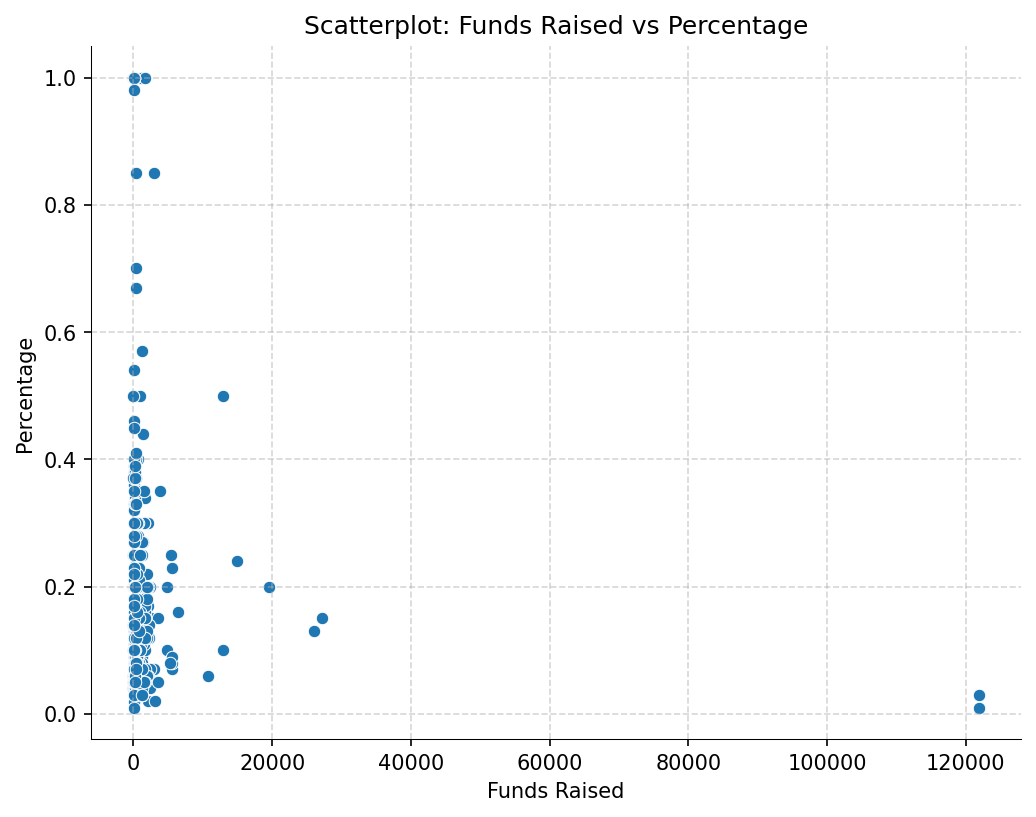

In [142]:

mixed_df['Date'] = pd.to_datetime(mixed_df['Date'])

numeric_cols = mixed_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = mixed_df[numeric_cols]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Funds_Raised', y='Percentage', data=mixed_df.dropna(subset=['Funds_Raised', 'Percentage']))
plt.title('Scatterplot: Funds Raised vs Percentage')
plt.xlabel('Funds Raised')
plt.ylabel('Percentage')
plt.show()

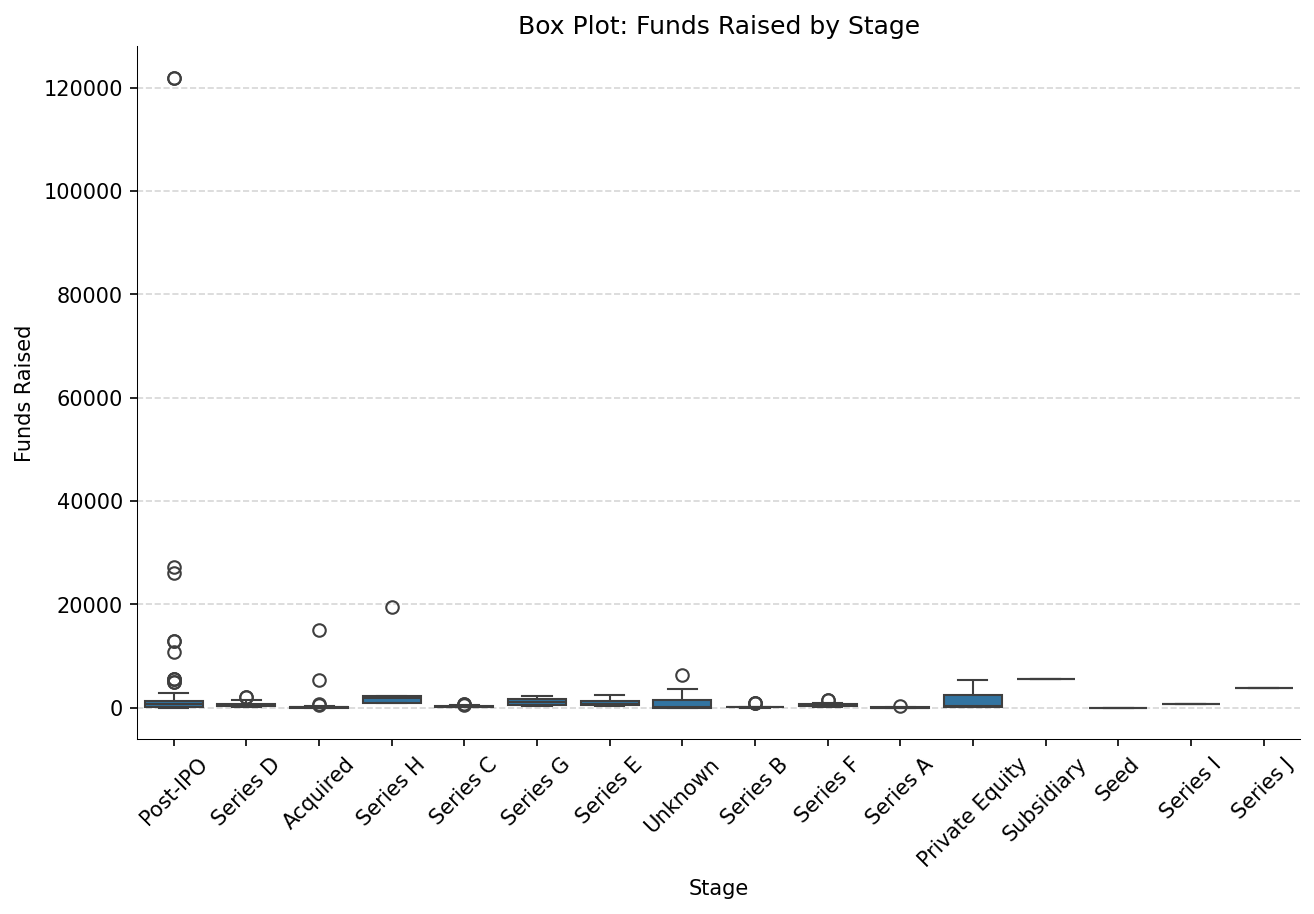

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage', y='Funds_Raised', data=mixed_df.dropna(subset=['Stage', 'Funds_Raised']))
plt.title('Box Plot: Funds Raised by Stage')
plt.xlabel('Stage')
plt.ylabel('Funds Raised')
plt.xticks(rotation=45)
plt.show()

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,Percentage,19,5.0,-0.2,0.6
1,Funds_Raised,35,9.2,-1058.0,2074.0
2,Laid_Off_Count,45,11.9,-366.2,807.8


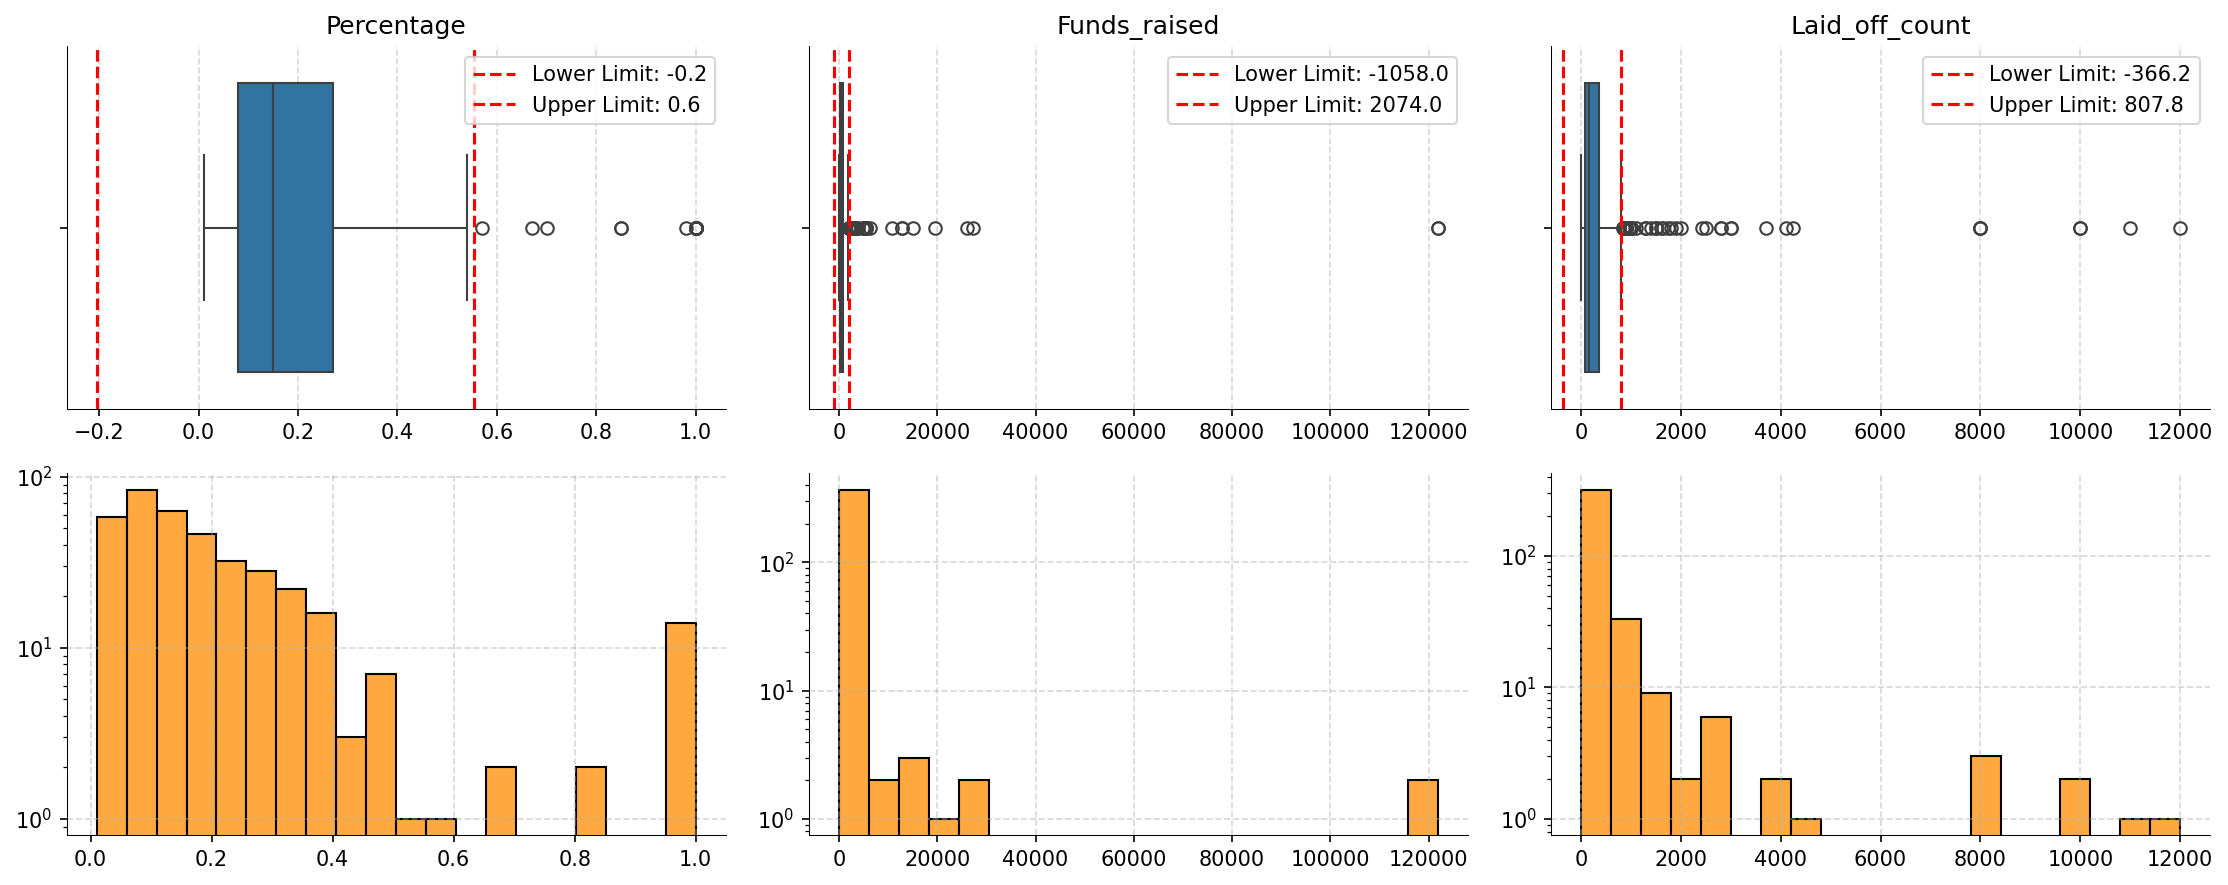

In [144]:
outlier_col = mixed_df.select_dtypes(include = 'float').columns
detect_outliers(mixed_df, outlier_col)

In [145]:
clean_df = mixed_df.query('Percentage < 0.8 and Funds_Raised < 10000 and Laid_Off_Count < 5000')
# clean_df = mixed_df
clean_df.info()
df1 = clean_df
df1.dropna(inplace=True)
df1.insert(9, 'strength',np.nan)

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 1 to 3481
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         348 non-null    object        
 1   City            348 non-null    object        
 2   Industry        348 non-null    object        
 3   Percentage      348 non-null    float64       
 4   Date            348 non-null    datetime64[ns]
 5   Funds_Raised    348 non-null    float64       
 6   Stage           348 non-null    object        
 7   Country         348 non-null    object        
 8   Laid_Off_Count  348 non-null    float64       
 9   Reason          348 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 29.9+ KB


C:\Users\anura\AppData\Local\Temp\ipykernel_16716\772357600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
for i in df1.index:
    df1["strength"][i] = (round(((1/(df1["Percentage"][i]))*df1["Laid_Off_Count"][i]),0))
df1 

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\2380939467.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\anura\AppData\Local\Temp\ipykernel_16716\2380939467.py:2: SettingWithCopyWarning:


A value is trying to be set on a co

,Company,City,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,strength,Reason
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,13400.0,layoff_permanent
24,Voi,Stockholm,Transportation,0.12,2024-02-16,515.0,Series D,United States,120.0,1000.0,closure_permanent
25,Toast,Boston,Food,0.10,2024-02-15,962.0,Post-IPO,United States,550.0,5500.0,down_sizing
26,Sonder,SF Bay Area,Travel,0.17,2024-02-15,839.0,Post-IPO,United States,106.0,624.0,layoff_temporary
31,Cisco,SF Bay Area,Infrastructure,0.05,2024-02-14,2.0,Post-IPO,United States,4250.0,85000.0,layoff_permanent
...,...,...,...,...,...,...,...,...,...,...,...
3445,Sonder,SF Bay Area,Travel,0.33,2020-03-24,359.0,Series D,United States,400.0,1212.0,layoff_temporary
3448,Zeus Living,SF Bay Area,Real Estate,0.30,2020-03-24,79.0,Series B,United States,80.0,267.0,layoff_permanent
3455,Leafly,Seattle,Retail,0.50,2020-03-23,2.0,Acquired,United States,91.0,182.0,down_sizing
3456,The Guild,Austin,Travel,0.22,2020-03-23,36.0,Series B,United States,38.0,173.0,layoff_temporary


In [147]:
df1.reset_index(inplace = True )


In [148]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month_name()
df1['Quarters'] = df1['Date'].dt.to_period('Q')

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\4191632119.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\4191632119.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\4191632119.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

## df1

In [149]:
df1["Industry"].unique()

array(['Consumer', 'Transportation', 'Food', 'Travel', 'Infrastructure',
       'Healthcare', 'Security', 'Finance', 'Energy', 'Sales', 'Retail',
       'Hardware', 'Other', 'Logistics', 'Media', 'Data', 'Recruiting',
       'Product', 'HR', 'Real Estate', 'Aerospace', 'Crypto', 'Education',
       'Support', 'Fitness', 'Marketing', 'Legal', 'Construction'],
      dtype=object)

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\2275287908.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\anura\AppData\Local\Temp\ipykernel_16716\2275287908.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\anura\AppData\Local\Temp\ipykernel_16716\2275287908.py:15: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



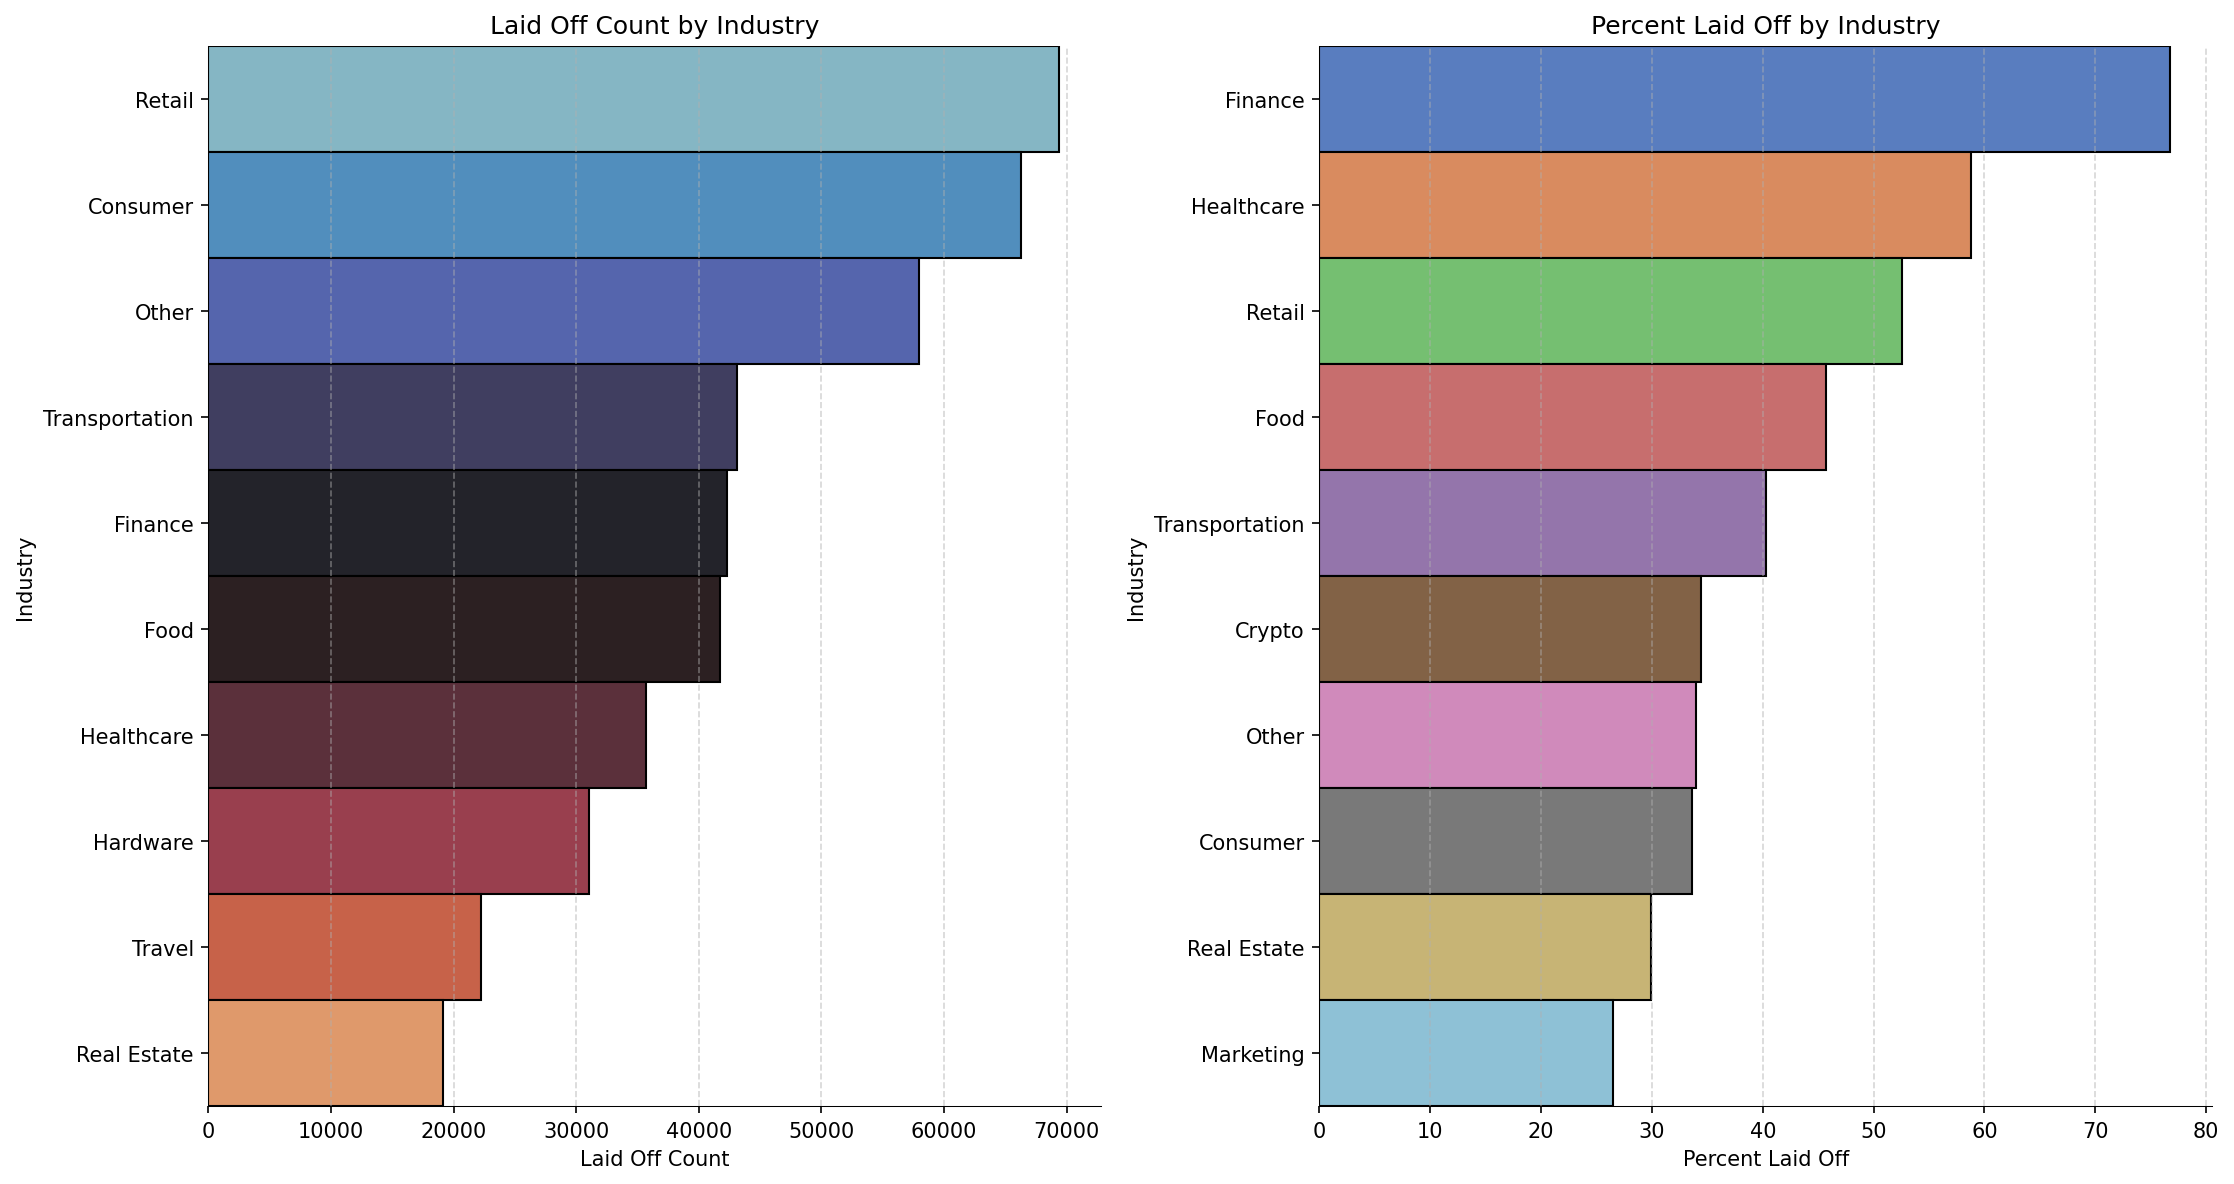

In [150]:
fig, ax = plt.subplots(1, 2,figsize=(15,8))
# plt.grid(False)
ax[0] = sns.barplot(data=df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10), 
            y='Industry', x='Laid_Off_Count', errorbar=None, width=1, edgecolor='black' ,palette='icefire', ax=ax[0])
ax[0].set(title='Laid Off Count by Industry', xlabel='Laid Off Count')


ax[1] = sns.barplot(data=df.groupby('Industry')['Percentage'].sum().sort_values(ascending=False).reset_index().head(10), 
            y='Industry', x='Percentage', errorbar=None, width=1, edgecolor='black', palette='muted', ax=ax[1])
ax[1].set(title='Percent Laid Off by Industry', xlabel='Percent Laid Off')

# plt.grid(False)
plt.savefig('Industry.png',transparent=True)
plt.tight_layout()
fig.show()

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\688476371.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\anura\AppData\Local\Temp\ipykernel_16716\688476371.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



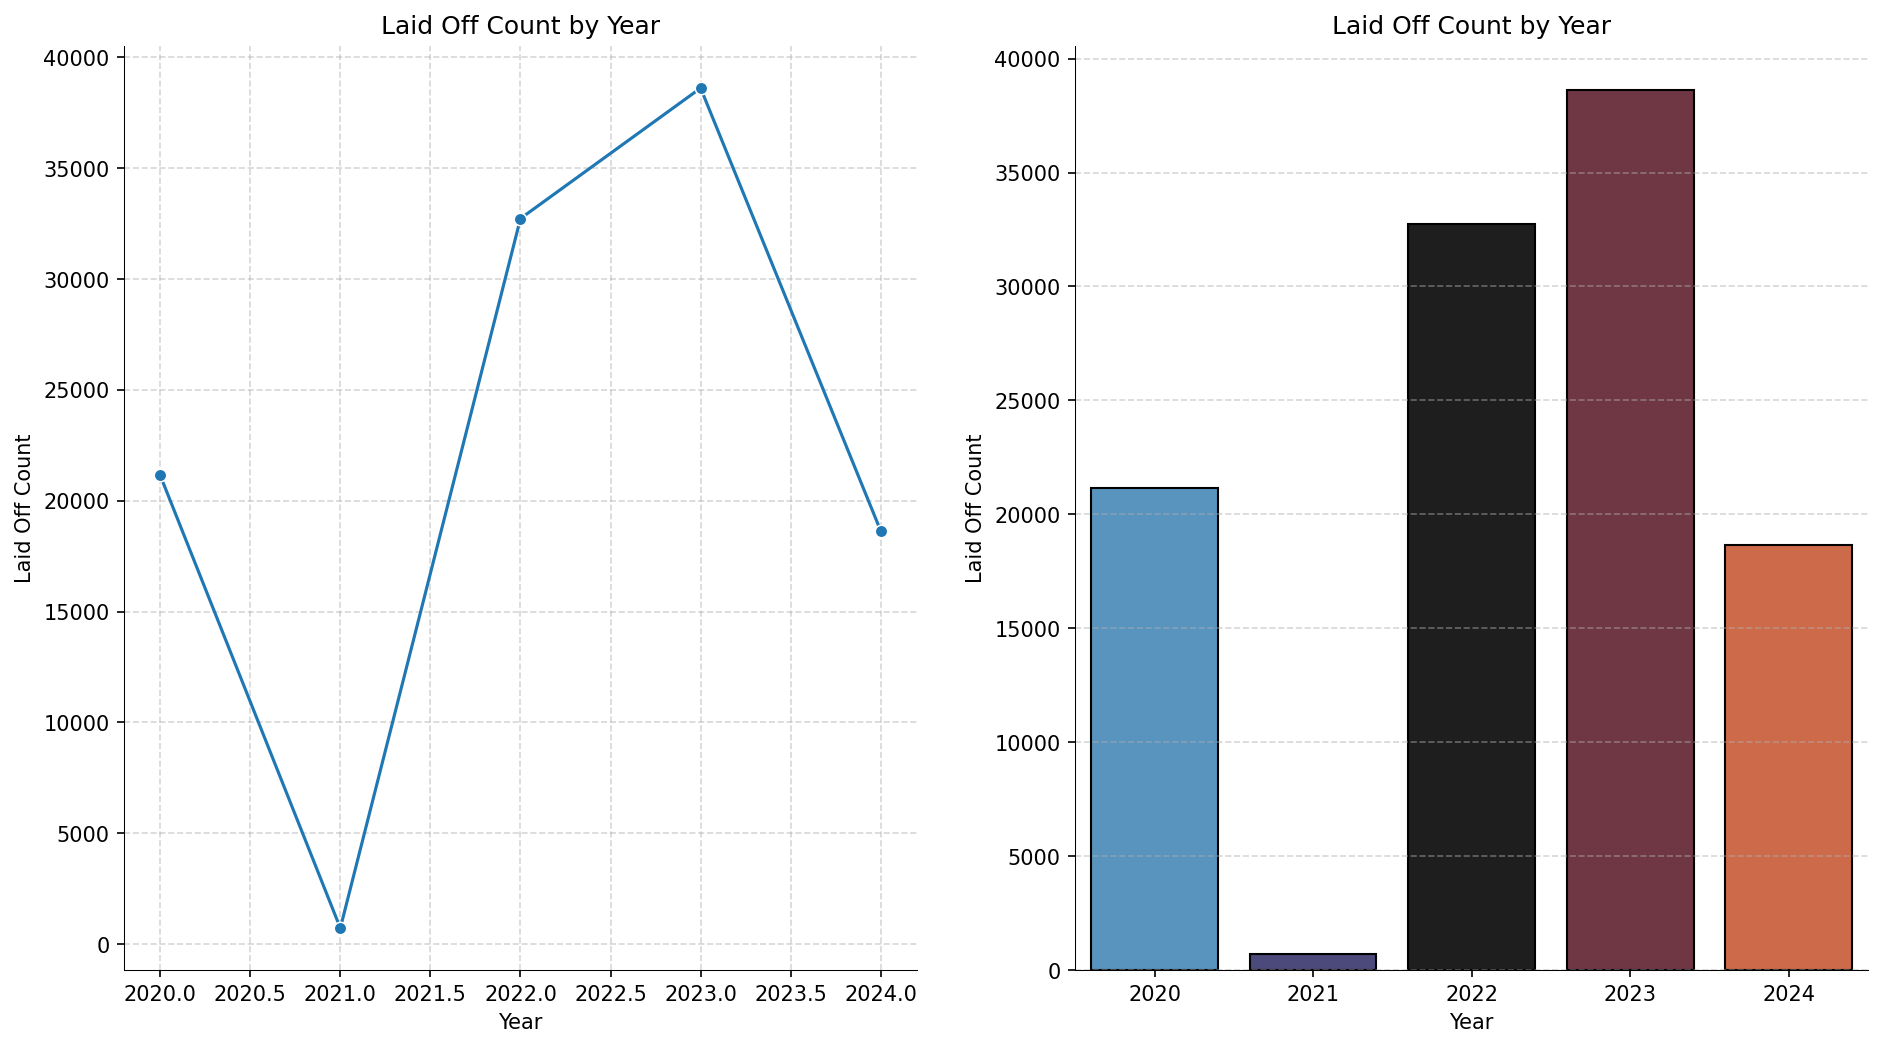

In [151]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0] = sns.lineplot(data=df1.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count', 
                  errorbar=None, marker='o', ax=ax[0])
ax[0].set(title='Laid Off Count by Year', xlabel ="Year",  ylabel='Laid Off Count')


ax[1] = sns.barplot(data=df1.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count', 
                  errorbar=None, ax=ax[1], palette='icefire', linewidth=1,edgecolor='black')
ax[1].set(title='Laid Off Count by Year', xlabel = "Year" ,ylabel='Laid Off Count')


fig.show()

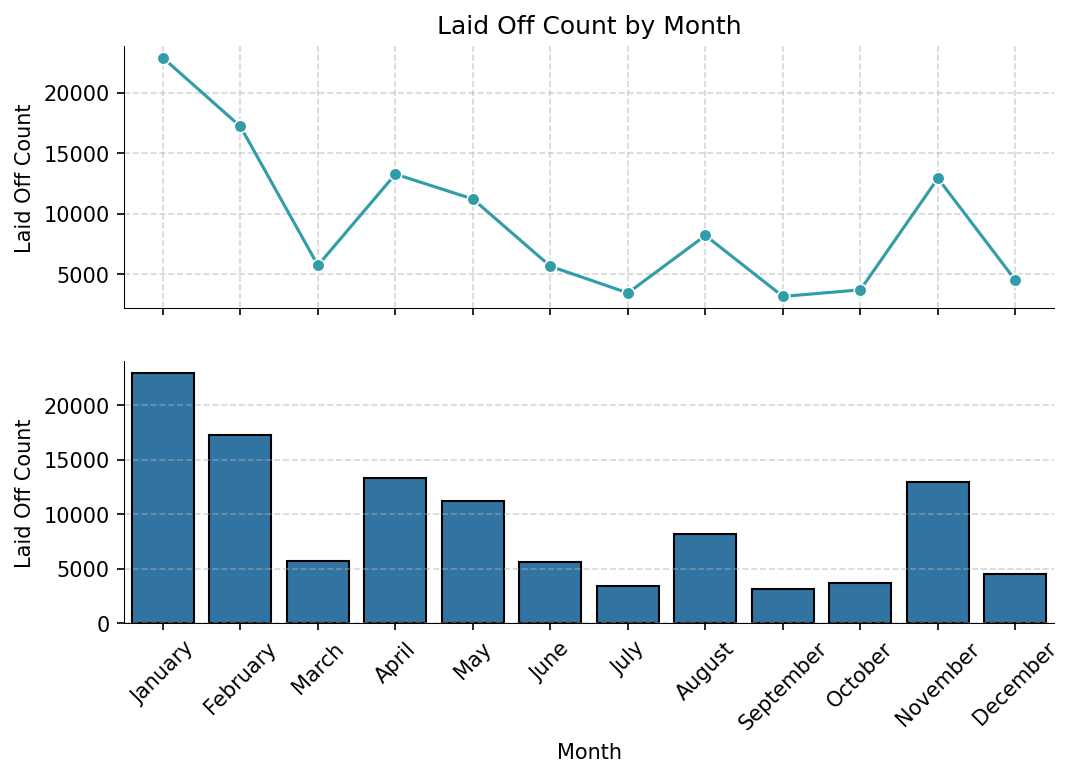

In [152]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,5))
data=df1.groupby('Month')['Laid_Off_Count'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data = data.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))


ax[0] = sns.lineplot(data, x='Month', y='Laid_Off_Count', 
                  errorbar=None, marker='o', ax=ax[0], color='#329da8', )
ax[0].set(title='Laid Off Count by Month', ylabel='Laid Off Count')

ax[1] = sns.barplot(data.reset_index(), x='Month', y='Laid_Off_Count', 
                  errorbar=None, ax=ax[1],  linewidth=1,edgecolor='black')
ax[1].set(ylabel='Laid Off Count')

# plt.tight_layout()
plt.xticks(rotation=45)

plt.savefig('Monthly.png',transparent=True)
plt.show()

In [153]:
top_layoffs_quarters = df1.groupby(by="Quarters")["Laid_Off_Count"].sum().sort_values(ascending=False).head(10).reset_index()
top_layoffs_quarters

,Quarters,Laid_Off_Count
0,2023Q1,21085.0
1,2024Q1,18637.0
2,2020Q2,16521.0
3,2022Q4,15394.0
4,2022Q3,8907.0
5,2023Q2,8196.0
6,2023Q4,5630.0
7,2022Q2,5250.0
8,2023Q3,3706.0
9,2022Q1,3181.0


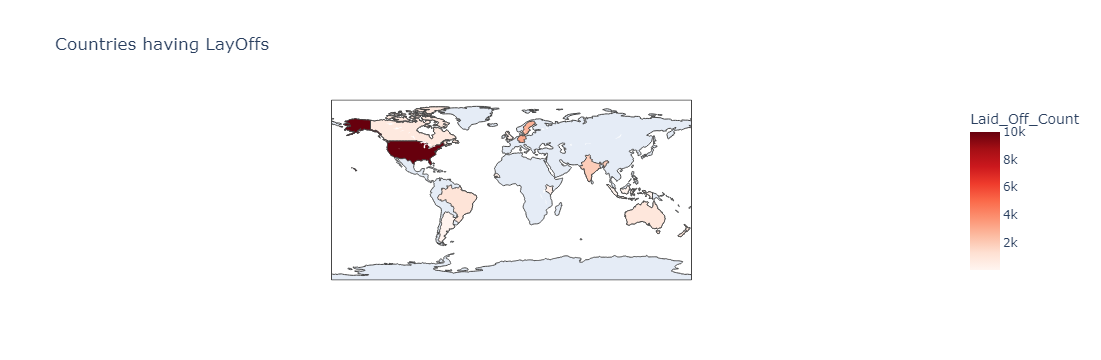

In [154]:
import plotly.express as px
from IPython.display import Image

world = df1.groupby("Country")["Laid_Off_Count"].sum().reset_index()
df1['Country'].value_counts()
figure = px.choropleth(world,locations="Country",
                       locationmode = "country names", color="Laid_Off_Count",
                       hover_name="Country",range_color=[1,10000],
                       color_continuous_scale="reds",
                       title="Countries having LayOffs")
figure.show()

In [155]:
import squarify

In [156]:
sorted_df = df1.sort_values('Laid_Off_Count', ascending=False).head(10)

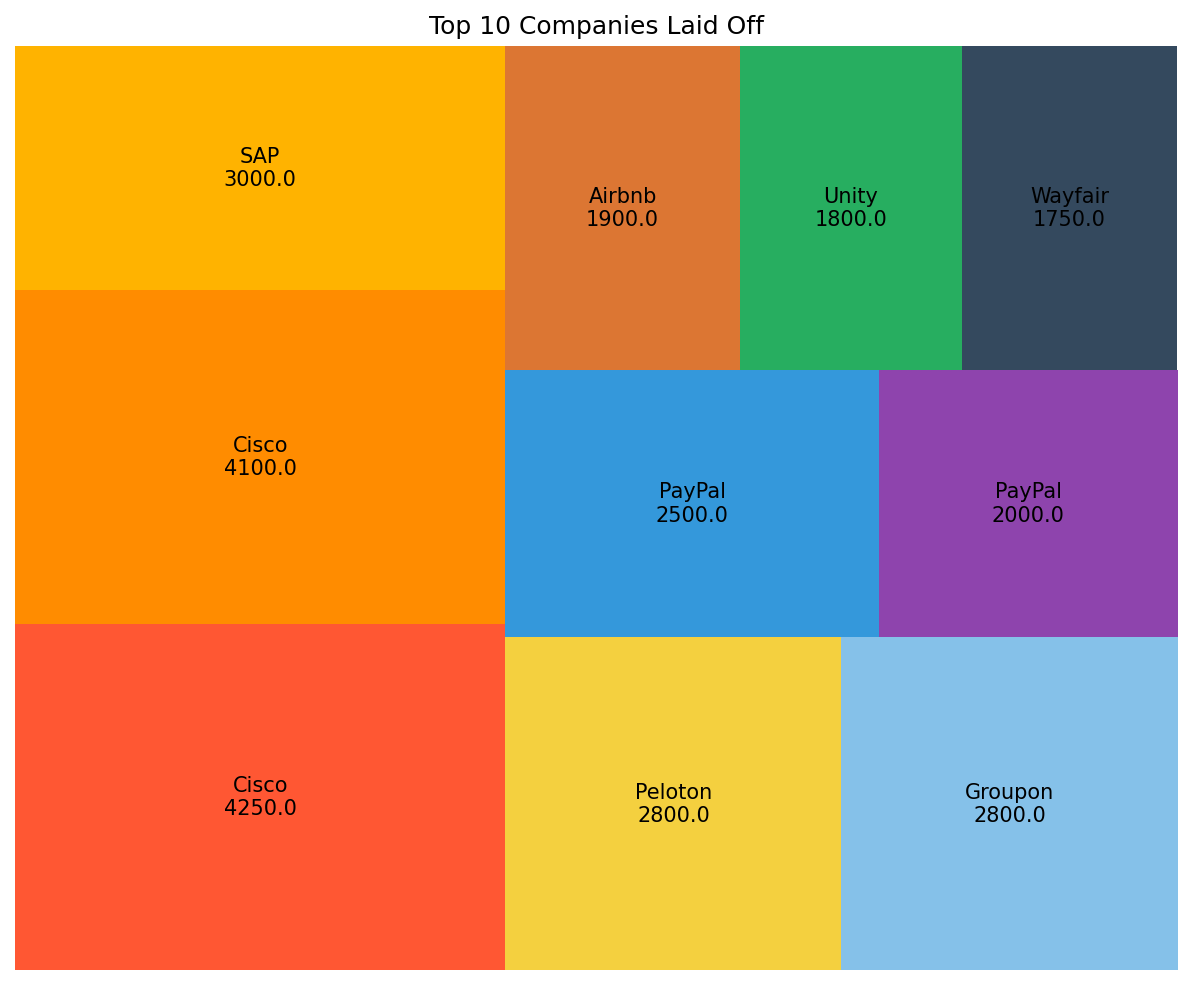

In [157]:
Companies = sorted_df["Company"].tolist()
Laid_off_count = sorted_df['Laid_Off_Count'].tolist()
colors = ['#FF5733', '#FF8C00', '#FFB300', '#F4D03F', '#85C1E9', '#3498DB', '#8E44AD', '#DC7633', '#27AE60', '#34495E']
sizes = [count / sum(Laid_off_count) for count in Laid_off_count]
labels = [f'{company}\n{laid_off_count}' for company, laid_off_count in zip(Companies, Laid_off_count)]
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes,label = labels, color=colors)
plt.title('Top 10 Companies Laid Off')
plt.axis('off')
plt.show()

In [158]:
from prophet import Prophet
import os
os

<module 'os' (frozen)>

In [159]:
total_laid_off_count = df1.groupby('Date')['Laid_Off_Count'].sum().reset_index()
total_laid_off_count

,Date,Laid_Off_Count
0,2020-03-13,8.0
1,2020-03-23,129.0
2,2020-03-24,480.0
3,2020-03-25,342.0
4,2020-03-27,580.0
...,...,...
242,2024-02-13,250.0
243,2024-02-14,4250.0
244,2024-02-15,656.0
245,2024-02-16,120.0


In [160]:
total_laid_off_count.columns=['ds','y']
total_laid_off_count ['ds']=pd.to_datetime(total_laid_off_count['ds'])

In [161]:
sample_data = total_laid_off_count.tail(120)
sample_data

,ds,y
127,2022-11-18,405.0
128,2022-11-21,93.0
129,2022-11-24,100.0
130,2022-11-30,352.0
131,2022-12-02,47.0
...,...,...
242,2024-02-13,250.0
243,2024-02-14,4250.0
244,2024-02-15,656.0
245,2024-02-16,120.0


In [162]:
m=Prophet(interval_width=0.9)
m.fit(sample_data)
future=m.make_future_dataframe(periods=30)
future.tail(20)

18:49:22 - cmdstanpy - INFO - Chain [1] start processing
18:49:22 - cmdstanpy - INFO - Chain [1] done processing


,ds
130,2024-03-10
131,2024-03-11
132,2024-03-12
133,2024-03-13
134,2024-03-14
135,2024-03-15
136,2024-03-16
137,2024-03-17
138,2024-03-18
139,2024-03-19


In [163]:
forecast = m.predict(future)
forecast.tail(20)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
145,2024-03-25,673.742825,-440.065874,1836.919863
146,2024-03-26,818.260960,-231.545210,1984.891732
147,2024-03-27,738.379993,-349.905684,1874.002299
148,2024-03-28,729.700269,-422.182356,1934.782941
149,2024-03-29,642.264660,-468.168892,1759.968726


C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



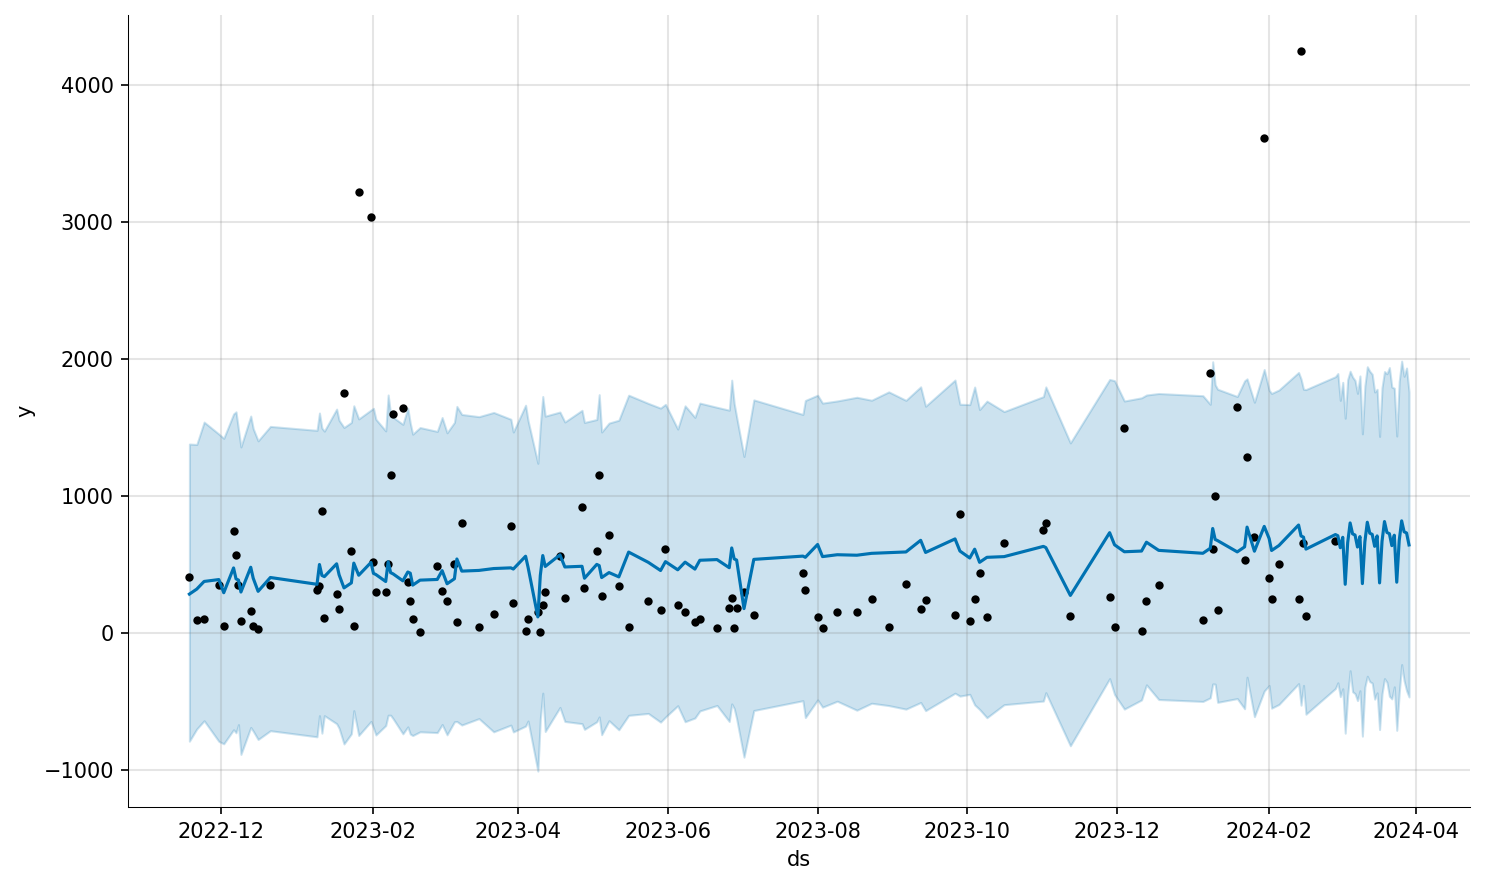

In [164]:
Predicted_layoffs_count = m.plot(forecast)

C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



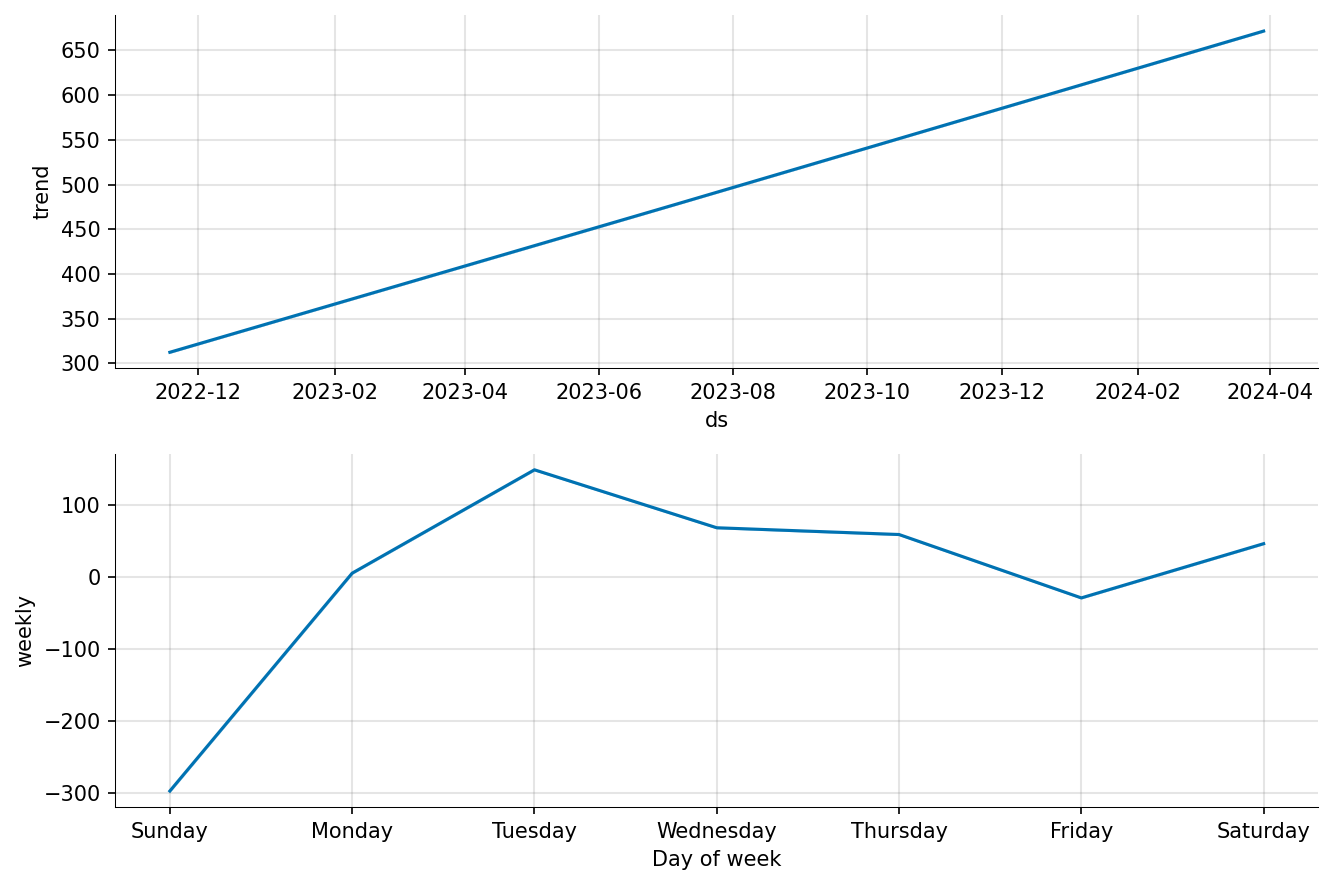

In [165]:
confirmed_forecast_plot1 = m.plot_components(forecast)

In [166]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           348 non-null    int64         
 1   Company         348 non-null    object        
 2   City            348 non-null    object        
 3   Industry        348 non-null    object        
 4   Percentage      348 non-null    float64       
 5   Date            348 non-null    datetime64[ns]
 6   Funds_Raised    348 non-null    float64       
 7   Stage           348 non-null    object        
 8   Country         348 non-null    object        
 9   Laid_Off_Count  348 non-null    float64       
 10  strength        348 non-null    float64       
 11  Reason          348 non-null    object        
 12  Year            348 non-null    int32         
 13  Month           348 non-null    object        
 14  Quarters        348 non-null    period[Q-DEC] 
dtypes: dat

In [167]:
train = total_laid_off_count
test = total_laid_off_count.iloc[len(total_laid_off_count)-365:]

train

,ds,y
0,2020-03-13,8.0
1,2020-03-23,129.0
2,2020-03-24,480.0
3,2020-03-25,342.0
4,2020-03-27,580.0
...,...,...
242,2024-02-13,250.0
243,2024-02-14,4250.0
244,2024-02-15,656.0
245,2024-02-16,120.0


In [168]:
set(train['y'])

{8.0,
 10.0,
 15.0,
 16.0,
 17.0,
 20.0,
 25.0,
 30.0,
 33.0,
 34.0,
 37.0,
 38.0,
 40.0,
 44.0,
 45.0,
 47.0,
 49.0,
 50.0,
 59.0,
 60.0,
 62.0,
 64.0,
 68.0,
 70.0,
 73.0,
 75.0,
 78.0,
 80.0,
 85.0,
 86.0,
 87.0,
 90.0,
 93.0,
 94.0,
 99.0,
 100.0,
 102.0,
 111.0,
 114.0,
 117.0,
 120.0,
 125.0,
 129.0,
 130.0,
 131.0,
 133.0,
 134.0,
 136.0,
 138.0,
 140.0,
 145.0,
 147.0,
 149.0,
 150.0,
 153.0,
 155.0,
 160.0,
 164.0,
 170.0,
 175.0,
 178.0,
 180.0,
 181.0,
 190.0,
 194.0,
 200.0,
 201.0,
 219.0,
 220.0,
 223.0,
 230.0,
 232.0,
 235.0,
 237.0,
 240.0,
 245.0,
 250.0,
 255.0,
 258.0,
 260.0,
 265.0,
 270.0,
 272.0,
 284.0,
 293.0,
 300.0,
 301.0,
 309.0,
 315.0,
 316.0,
 326.0,
 340.0,
 342.0,
 349.0,
 350.0,
 352.0,
 360.0,
 361.0,
 370.0,
 400.0,
 405.0,
 440.0,
 462.0,
 470.0,
 480.0,
 485.0,
 500.0,
 521.0,
 530.0,
 550.0,
 560.0,
 570.0,
 580.0,
 590.0,
 600.0,
 610.0,
 612.0,
 624.0,
 656.0,
 660.0,
 670.0,
 682.0,
 700.0,
 706.0,
 715.0,
 716.0,
 745.0,
 750.0,
 780.0,
 784

In [169]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

18:49:23 - cmdstanpy - INFO - Chain [1] start processing
18:49:23 - cmdstanpy - INFO - Chain [1] done processing


In [170]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
607,2025-02-23,240.439509,-593.512228,913.140725,240.392779,240.490242,-20.683009,-20.683009,-20.683009,-40.757735,-40.757735,-40.757735,20.074726,20.074726,20.074726,0.0,0.0,0.0,219.756499
608,2025-02-24,240.411925,-332.340769,1132.836885,240.365005,240.462823,162.452043,162.452043,162.452043,176.159584,176.159584,176.159584,-13.707542,-13.707542,-13.707542,0.0,0.0,0.0,402.863967
609,2025-02-25,240.384341,-322.278533,1135.614213,240.337196,240.435402,173.474390,173.474390,173.474390,217.439958,217.439958,217.439958,-43.965568,-43.965568,-43.965568,0.0,0.0,0.0,413.858731
610,2025-02-26,240.356757,-271.374270,1177.468675,240.309375,240.407977,189.975030,189.975030,189.975030,260.619245,260.619245,260.619245,-70.644215,-70.644215,-70.644215,0.0,0.0,0.0,430.331787
611,2025-02-27,240.329174,-496.438500,1008.903805,240.281553,240.380553,16.003819,16.003819,16.003819,109.759225,109.759225,109.759225,-93.755406,-93.755406,-93.755406,0.0,0.0,0.0,256.332993


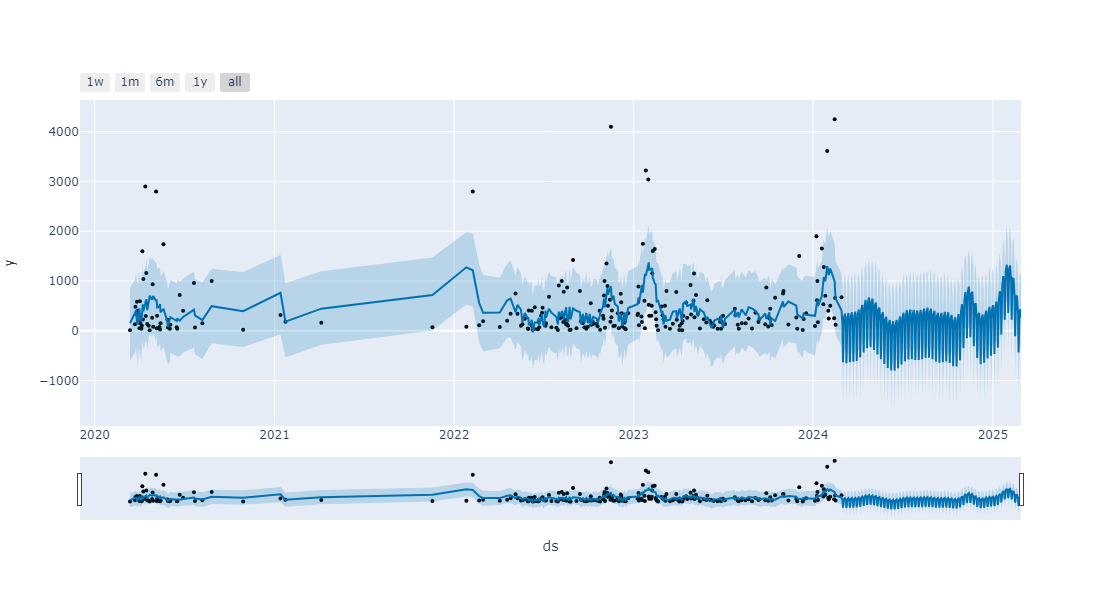

In [171]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [172]:
df1

,index,Company,City,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,strength,Reason,Year,Month,Quarters
0,1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,2.0,Post-IPO,United States,670.0,13400.0,layoff_permanent,2024,February,2024Q1
1,24,Voi,Stockholm,Transportation,0.12,2024-02-16,515.0,Series D,United States,120.0,1000.0,closure_permanent,2024,February,2024Q1
2,25,Toast,Boston,Food,0.10,2024-02-15,962.0,Post-IPO,United States,550.0,5500.0,down_sizing,2024,February,2024Q1
3,26,Sonder,SF Bay Area,Travel,0.17,2024-02-15,839.0,Post-IPO,United States,106.0,624.0,layoff_temporary,2024,February,2024Q1
4,31,Cisco,SF Bay Area,Infrastructure,0.05,2024-02-14,2.0,Post-IPO,United States,4250.0,85000.0,layoff_permanent,2024,February,2024Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,3445,Sonder,SF Bay Area,Travel,0.33,2020-03-24,359.0,Series D,United States,400.0,1212.0,layoff_temporary,2020,March,2020Q1
344,3448,Zeus Living,SF Bay Area,Real Estate,0.30,2020-03-24,79.0,Series B,United States,80.0,267.0,layoff_permanent,2020,March,2020Q1
345,3455,Leafly,Seattle,Retail,0.50,2020-03-23,2.0,Acquired,United States,91.0,182.0,down_sizing,2020,March,2020Q1
346,3456,The Guild,Austin,Travel,0.22,2020-03-23,36.0,Series B,United States,38.0,173.0,layoff_temporary,2020,March,2020Q1


In [173]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           348 non-null    int64         
 1   Company         348 non-null    object        
 2   City            348 non-null    object        
 3   Industry        348 non-null    object        
 4   Percentage      348 non-null    float64       
 5   Date            348 non-null    datetime64[ns]
 6   Funds_Raised    348 non-null    float64       
 7   Stage           348 non-null    object        
 8   Country         348 non-null    object        
 9   Laid_Off_Count  348 non-null    float64       
 10  strength        348 non-null    float64       
 11  Reason          348 non-null    object        
 12  Year            348 non-null    int32         
 13  Month           348 non-null    object        
 14  Quarters        348 non-null    period[Q-DEC] 
dtypes: dat

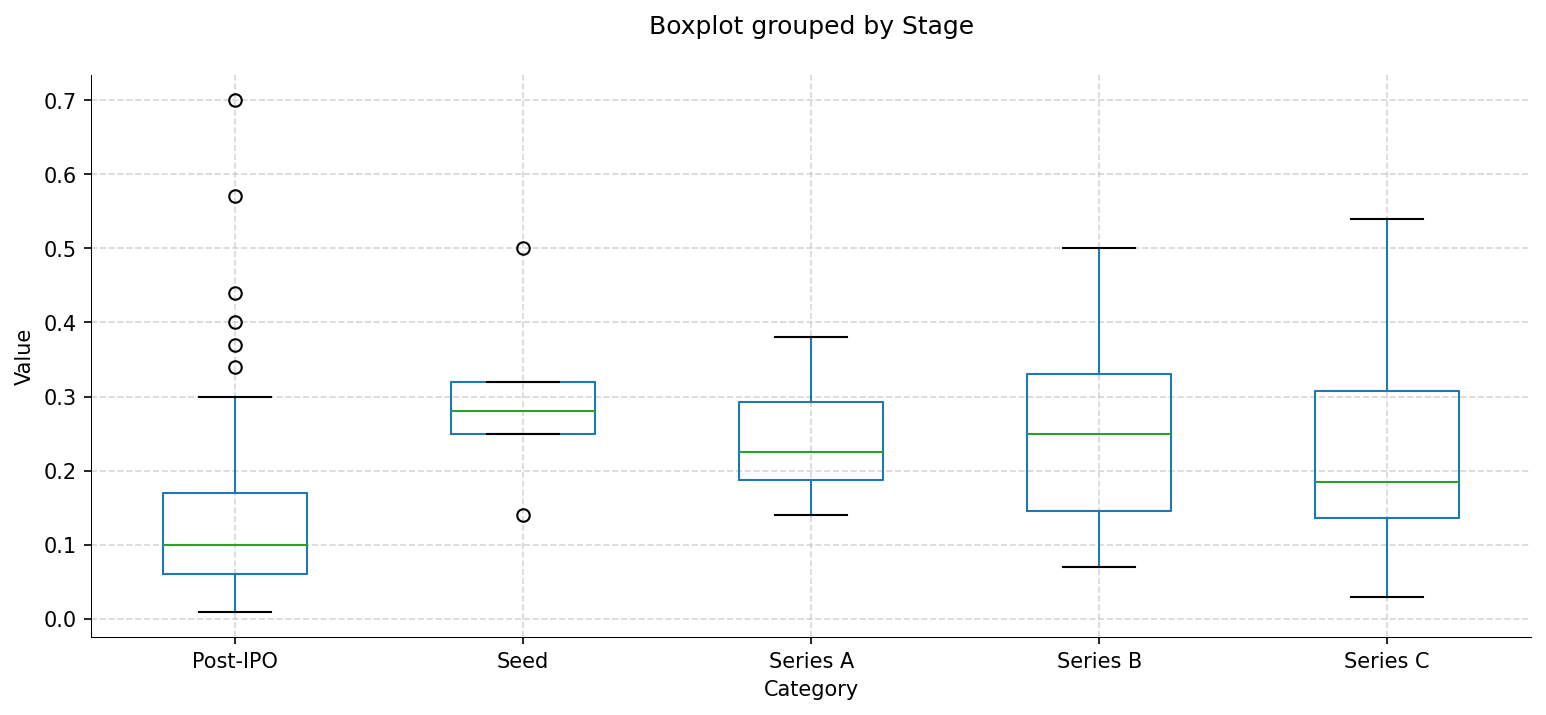

In [174]:
boxplt = list(df1[df1['Stage'] == cat]['Percentage'] for cat in ['Post-IPO','Seed','Series A','Series B','Series C'])
df1[df1['Stage'].isin(['Post-IPO','Seed','Series A','Series B','Series C'])].boxplot(column = 'Percentage', by = 'Stage')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title(None)
# plt.title('Boxplot of Value by Category')
# Show the plot
plt.grid(True)
plt.savefig('box.png',transparent=True)
plt.show()

In [175]:
set(df1[df1['Stage'].isin(['Post-IPO','Seed','Series A','Series B','Series C'])]['Stage'])

{'Post-IPO', 'Seed', 'Series A', 'Series B', 'Series C'}

In [176]:
month = df1[['Percentage', 'Month']]
average_values = month.groupby('Month').mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_values = average_values.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
average_values

,Percentage
Month,
January,0.154324
February,0.146667
March,0.230741
April,0.228980
May,0.181471
June,0.143333
July,0.204706
August,0.145810
September,0.151538


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


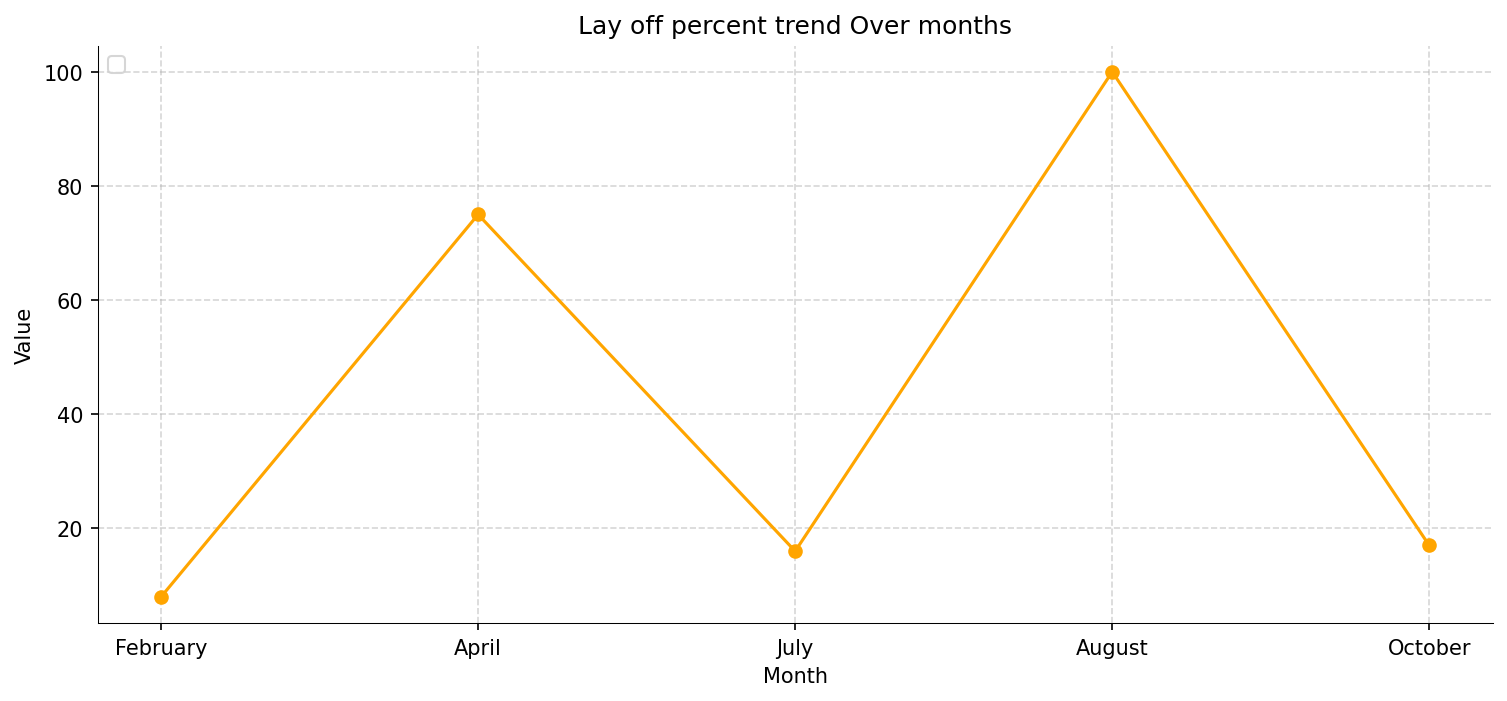

In [177]:
stage = "Seed"
df_2022 = df1[df1['Stage'] == stage][['Laid_Off_Count', 'Month']]
average_values22 = df_2022.groupby('Month').mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_values22 = average_values22.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
plt.plot(average_values22.index, average_values22.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(loc="upper left")
plt.title('Lay off percent trend Over months')

plt.grid(True)
plt.show()

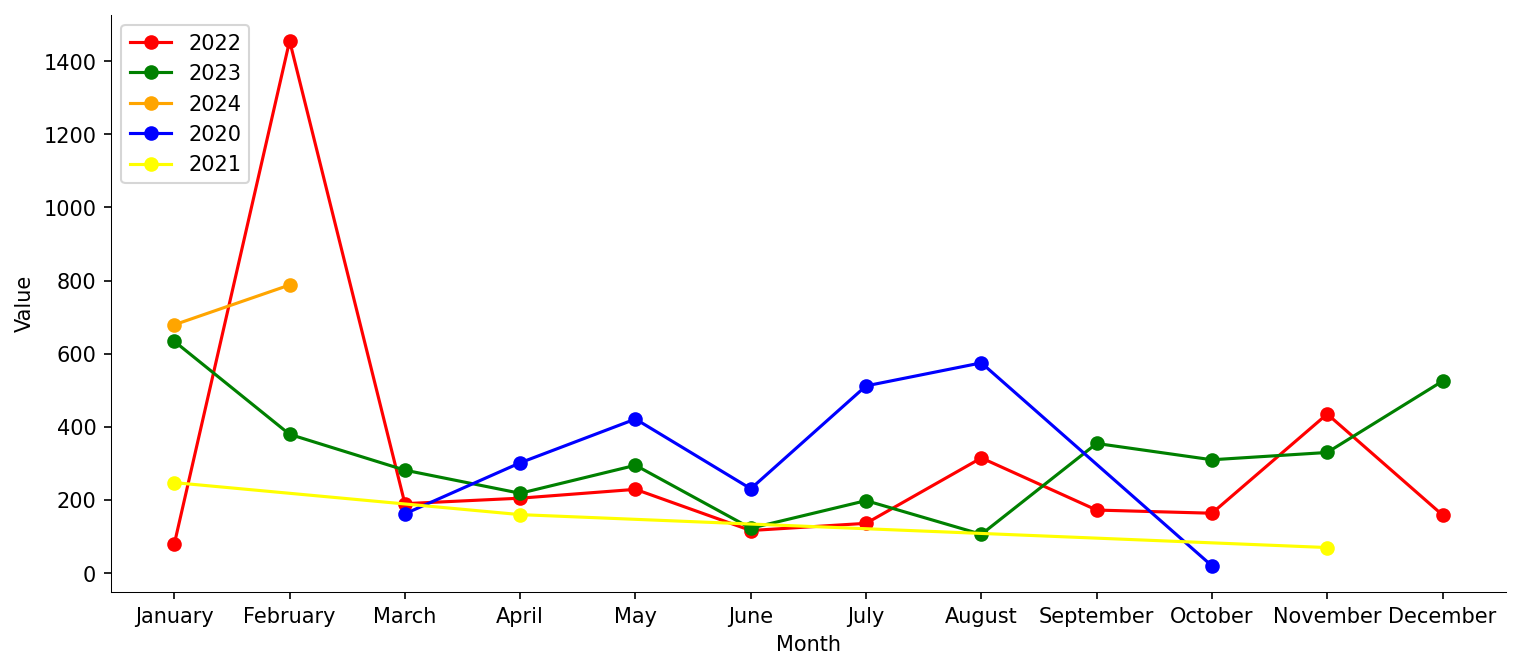

In [178]:
df_2020 = df1[df1['Year'] == 2020][['Laid_Off_Count', 'Month']]
df_2021 = df1[df1['Year'] == 2021][['Laid_Off_Count', 'Month']]
df_2022 = df1[df1['Year'] == 2022][['Laid_Off_Count', 'Month']]
df_2023 = df1[df1['Year'] == 2023][['Laid_Off_Count', 'Month']]
df_2024 = df1[df1['Year'] == 2024][['Laid_Off_Count', 'Month']]
average_values20 = df_2020.groupby('Month').mean()
average_values21 = df_2021.groupby('Month').mean()
average_values22 = df_2022.groupby('Month').mean()
average_values23 = df_2023.groupby('Month').mean()
average_values24 = df_2024.groupby('Month').mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_values20 = average_values20.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
average_values21 = average_values21.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
average_values22 = average_values22.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
average_values23 = average_values23.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))
average_values24 = average_values24.sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True))





plt.plot(average_values22.index, average_values22.values, marker='o', linestyle='-', color='red',label="2022")
plt.plot(average_values23.index, average_values23.values, marker='o', linestyle='-', color='green',label="2023")
plt.plot(average_values24.index, average_values24.values, marker='o', linestyle='-', color='orange',label="2024")
plt.plot(average_values20.index, average_values20.values, marker='o', linestyle='-', color='blue',label="2020")
plt.plot(average_values21.index, average_values21.values, marker='o', linestyle='-', color='yellow',label="2021")
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(loc="upper left")
# plt.title('Lay off percent trend Over months')

plt.grid(False)
plt.savefig('months.png',transparent=True)
# plt.grid(True)
plt.show()

In [179]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           348 non-null    int64         
 1   Company         348 non-null    object        
 2   City            348 non-null    object        
 3   Industry        348 non-null    object        
 4   Percentage      348 non-null    float64       
 5   Date            348 non-null    datetime64[ns]
 6   Funds_Raised    348 non-null    float64       
 7   Stage           348 non-null    object        
 8   Country         348 non-null    object        
 9   Laid_Off_Count  348 non-null    float64       
 10  strength        348 non-null    float64       
 11  Reason          348 non-null    object        
 12  Year            348 non-null    int32         
 13  Month           348 non-null    object        
 14  Quarters        348 non-null    period[Q-DEC] 
dtypes: dat

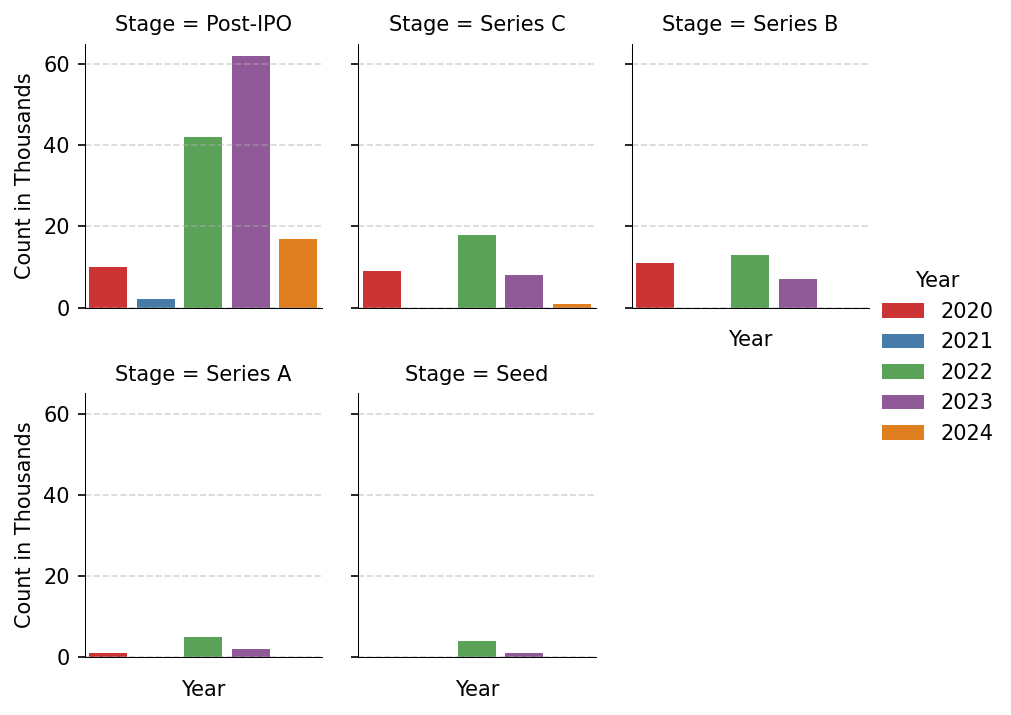

In [180]:
dat = df1[df1['Stage'].isin(['Post-IPO','Seed','Series A','Series B','Series C'])]
g = sns.catplot(x="Year", col="Stage", col_wrap=3, 
                data=dat[dat.Laid_Off_Count.notnull()], 
                kind="count", height=2.5, aspect=.8, hue="Year",palette="Set1")
g.set(xticklabels=[])  # remove the tick labels
g.set(ylabel = "Count in Thousands")
g.tick_params(bottom=False)
# df1[df1['Stage'].isin(['Post-IPO','Seed','Series A','Series B','Series C'])]['Stage']

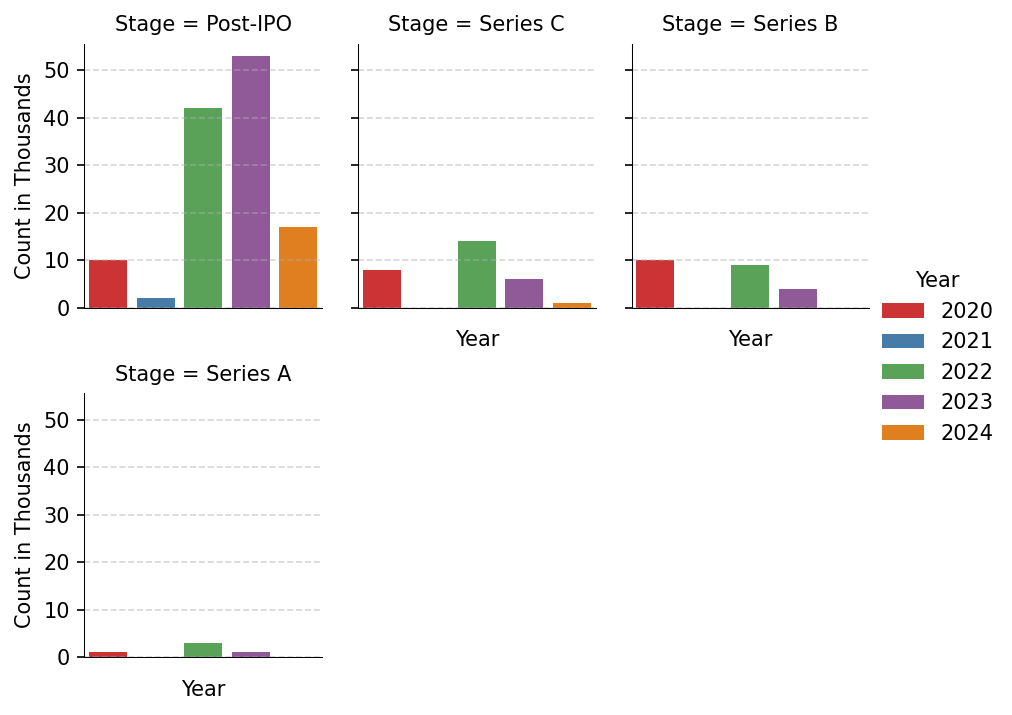

In [181]:
country = "United States"
dat = df1[df1['Stage'].isin(['Post-IPO','Seed','Series A','Series B','Series C'])]
dat = dat[dat['Country'] == country]
g = sns.catplot(x="Year", col="Stage", col_wrap=3, 
                data=dat[dat.Laid_Off_Count.notnull()], 
                kind="count", height=2.5, aspect=.8, hue="Year",palette="Set1")

g.set(xticklabels=[])  # remove the tick labels
g.set(ylabel = "Count in Thousands")
g.tick_params(bottom=False)
plt.show()

In [182]:
df1['Country']

0      United States
1      United States
2      United States
3      United States
4      United States
           ...      
343    United States
344    United States
345    United States
346    United States
347    United States
Name: Country, Length: 348, dtype: object

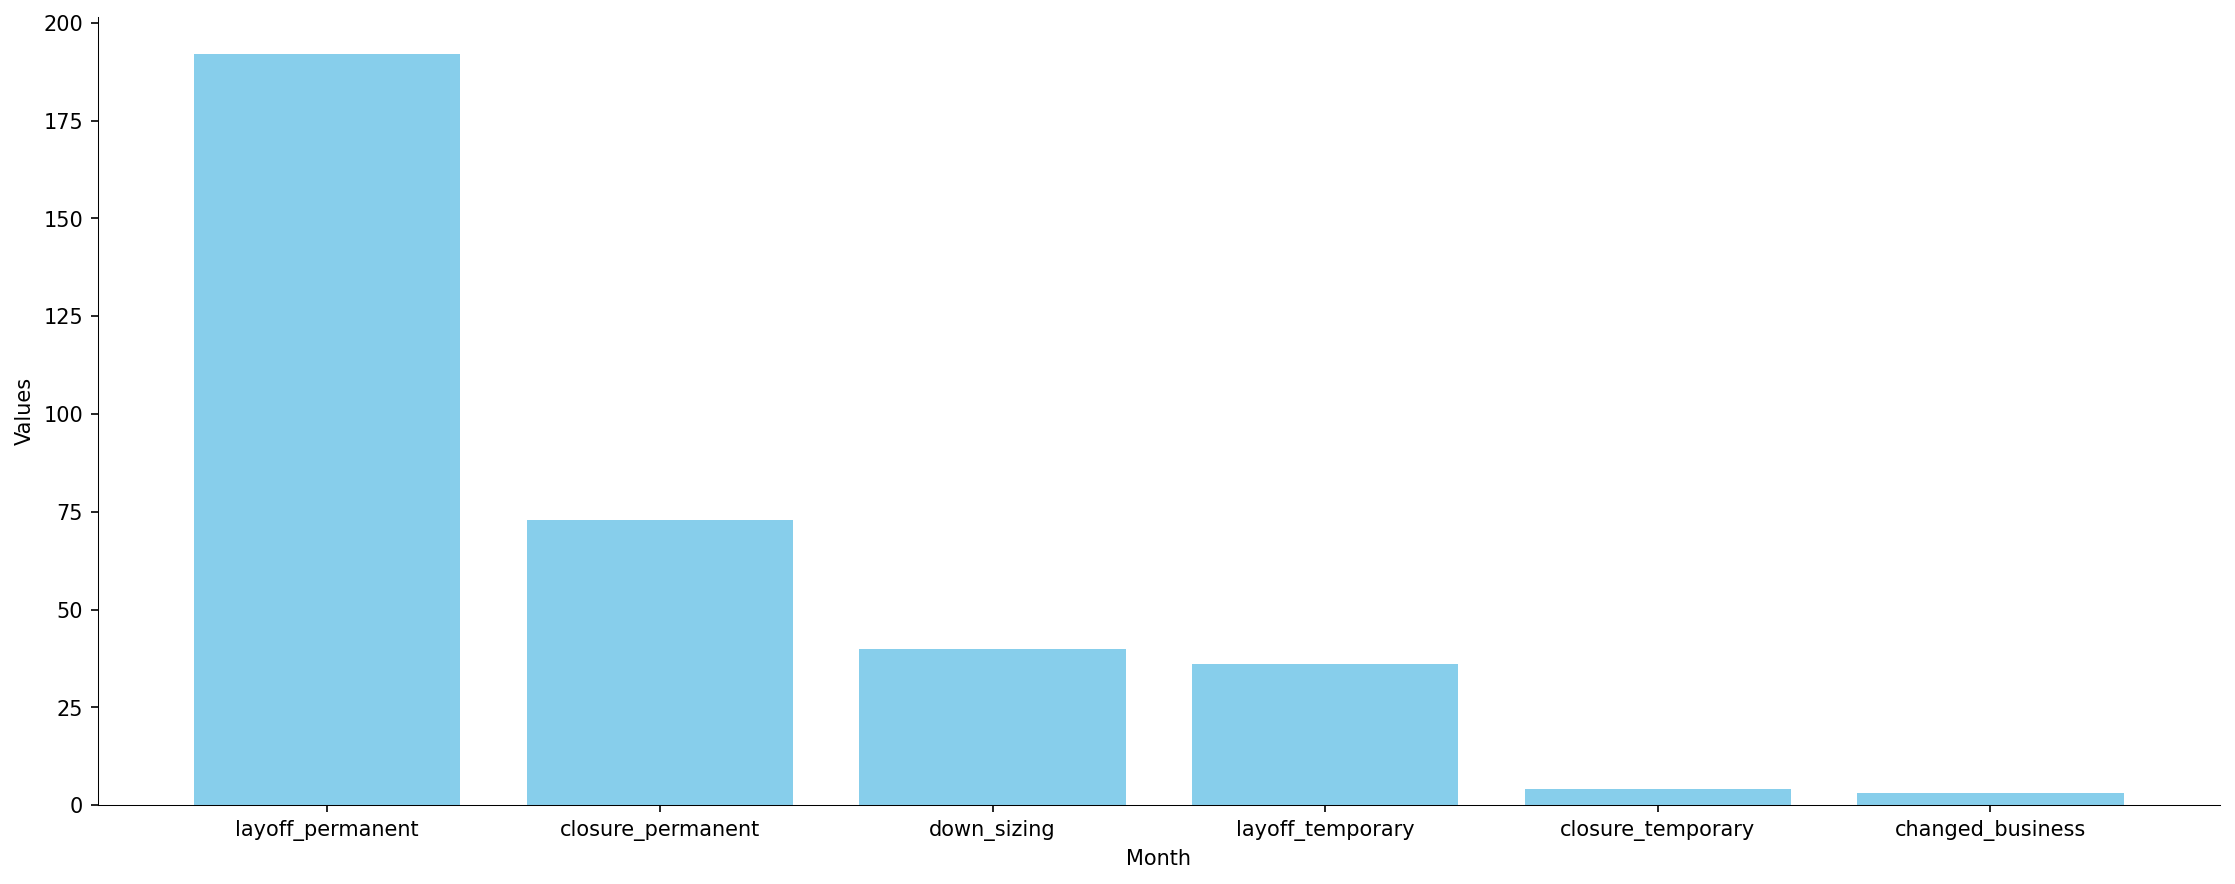

In [183]:
# sns.barplot(data=df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10), 
#             y='Industry', x='Laid_Off_Count', errorbar=None, width=1, edgecolor='black' ,palette='icefire', ax=ax[0])
# ax[0].set(title='Laid Off Count by Industry', xlabel='Laid Off Count')
fig, ax = plt.subplots(figsize=(15, 6))
 
# Plot the bar chart
category_counts = df1['Reason'].value_counts()
sorted_counts = category_counts.sort_values(ascending=False)
ax.bar(sorted_counts.index, sorted_counts.values, color='skyblue')

# Customize the plot
ax.set( xlabel='Month', ylabel='Values')
 
# Rotate x-axis labels
# plt.xticks(rotation=30)
# plt.figure(figsize=(8, 6))
plt.grid(False)
plt.savefig('Reason.png',transparent=True)
# Display the plot
plt.tight_layout()
plt.show()


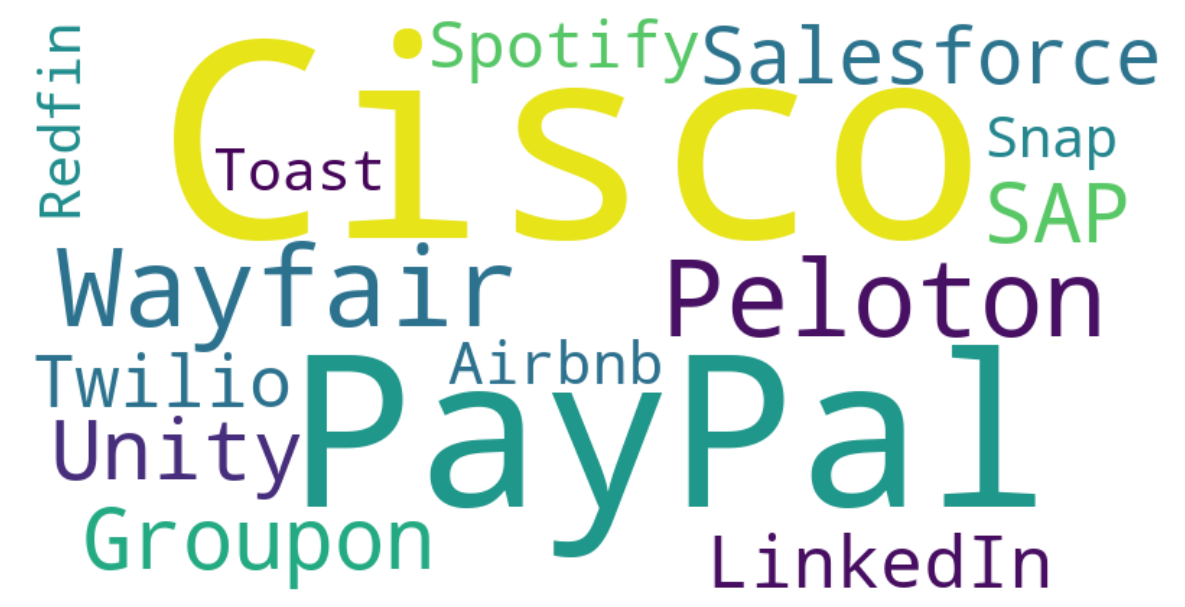

In [184]:
from wordcloud import WordCloud

series = "Post-IPO"
data = df1[["Company","Laid_Off_Count"]]
data = data.groupby('Company').sum()
data = data.sort_values(by="Laid_Off_Count")
data = data.tail(15)
data = data.squeeze().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

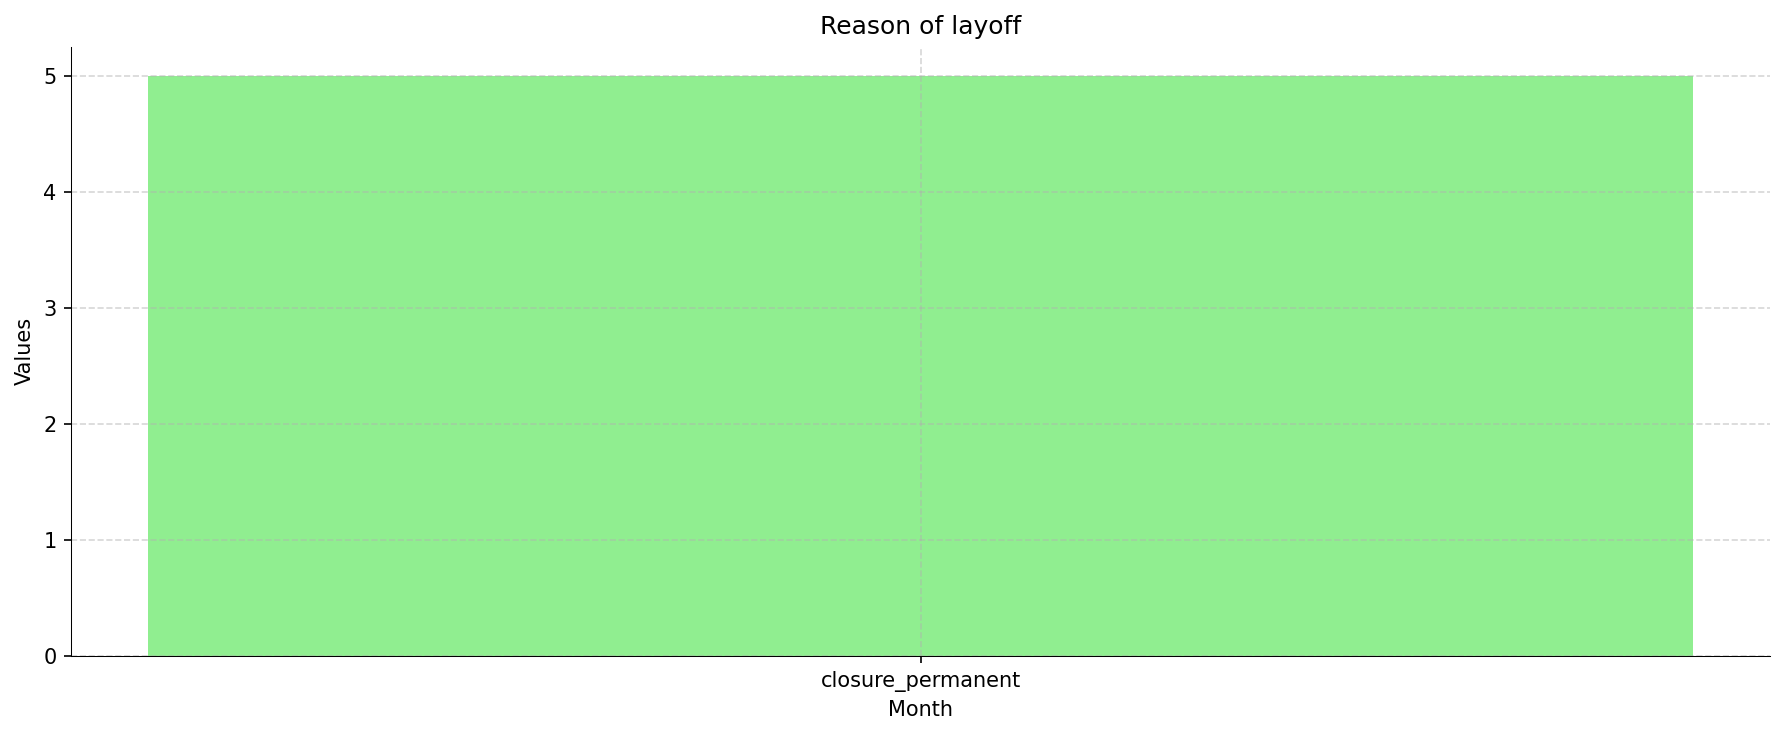

In [185]:
fig, ax = plt.subplots()
stage = "Seed"
# Plot the bar chart
category_counts = df1[df1['Stage'] == stage]['Reason'].value_counts()
sorted_counts = category_counts.sort_values(ascending=False)
ax.bar(sorted_counts.index, sorted_counts.values, color='lightgreen')

# Customize the plot
ax.set(title='Reason of layoff', xlabel='Month', ylabel='Values')
 
# Display the plot
plt.tight_layout()
plt.show()

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           348 non-null    int64         
 1   Company         348 non-null    object        
 2   City            348 non-null    object        
 3   Industry        348 non-null    object        
 4   Percentage      348 non-null    float64       
 5   Date            348 non-null    datetime64[ns]
 6   Funds_Raised    348 non-null    float64       
 7   Stage           348 non-null    object        
 8   Country         348 non-null    object        
 9   Laid_Off_Count  348 non-null    float64       
 10  strength        348 non-null    float64       
 11  Reason          348 non-null    object        
 12  Year            348 non-null    int32         
 13  Month           348 non-null    object        
 14  Quarters        348 non-null    period[Q-DEC] 
dtypes: dat

# Fitting a Liner Regression Model

In [187]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['category_label_encoded'] = pd.Series(label_encoder.fit_transform(df1['City']))

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\1386564010.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
predictionData = df1[['City','Industry','Percentage','Funds_Raised','Stage','Country','Laid_Off_Count','Year','Month']]
epsilon = 1e-10
Location = pd.DataFrame({"City":label_encoder.fit_transform(df1['City'])})
Industry = pd.DataFrame({"Industry":label_encoder.fit_transform(df1['Industry'])})
Stage = pd.DataFrame({"Stage":label_encoder.fit_transform(df1['Stage'])})
Country = pd.DataFrame({"Country":label_encoder.fit_transform(df1['Country'])})
Month = pd.DataFrame({"Month":label_encoder.fit_transform(df1['Month'])})
FundsRaised = pd.DataFrame({"Funds_Raised":np.log(df1['Funds_Raised']+epsilon)})
Year = pd.DataFrame({"Year":df1['Year']})
Predictors = {
    'Location':Location,
    'Industry':Industry,
    'Stage':Stage,
    'Country':Country,
    'Month':Month,
    'FundsRaised':FundsRaised,
    'Year':Year
}
predString = ['Location', 'Industry', 'Stage', 'Country', 'Month', 'FundsRaised', 'Year']

In [189]:
predictionData.apply(pd.to_numeric, errors='coerce')

,City,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Month
0,NaN,NaN,0.05,2.0,NaN,NaN,670.0,2024,NaN
1,NaN,NaN,0.12,515.0,NaN,NaN,120.0,2024,NaN
2,NaN,NaN,0.10,962.0,NaN,NaN,550.0,2024,NaN
3,NaN,NaN,0.17,839.0,NaN,NaN,106.0,2024,NaN
4,NaN,NaN,0.05,2.0,NaN,NaN,4250.0,2024,NaN
...,...,...,...,...,...,...,...,...,...
343,NaN,NaN,0.33,359.0,NaN,NaN,400.0,2020,NaN
344,NaN,NaN,0.30,79.0,NaN,NaN,80.0,2020,NaN
345,NaN,NaN,0.50,2.0,NaN,NaN,91.0,2020,NaN
346,NaN,NaN,0.22,36.0,NaN,NaN,38.0,2020,NaN


In [190]:
df_numeric = predictionData.apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN values
df_numeric = df_numeric.dropna()
correlation_matrix = df_numeric.corr()

# predictor_relation_metrics = correlation_matrix['Percentage'].drop('Perecentage')

# print(predictor_relation_metrics)
df_numeric

,City,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Month


In [191]:
df1['category_label_encoded']

0      31
1      38
2       4
3      31
4      31
       ..
343    31
344    31
345    36
346     1
347    19
Name: category_label_encoded, Length: 348, dtype: int32

##  Stepwise Predictor selection

In [192]:
def applyModel(regressionModel, df_enc):
    
    df_encoded = df_enc
    
    X = df_encoded.drop('Percentage', axis=1)
    y = df_encoded['Percentage']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = regressionModel
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

In [193]:
def stepperPredictor(regressionModel):
    steps = []
    rmses = list()
    minRmse = 1
    preds = []
    preStr = predString.copy()
    all_predicts = Predictors
    workingPred = None
    while True:
        for pred in preStr:
            rm = applyModel(regressionModel, pd.concat([predictionData[['Percentage']],Predictors[pred], *preds], axis=1))
            if rm < minRmse:
                minRmse = rm
                workingPred = pred
            
        if minRmse == 1:
            break
        preds.append(Predictors[workingPred])
        rmses.append(minRmse)
        steps.append(Predictors[workingPred].columns[0].split("_")[0])
        preStr.remove(workingPred)
        workingPred = None
        minRmse = 1

        if len(all_predicts) <= 0:
            print("pred empty")
            break
    
    result = pd.DataFrame({"RMSE":rmses}, index=steps)
    return result
    
    

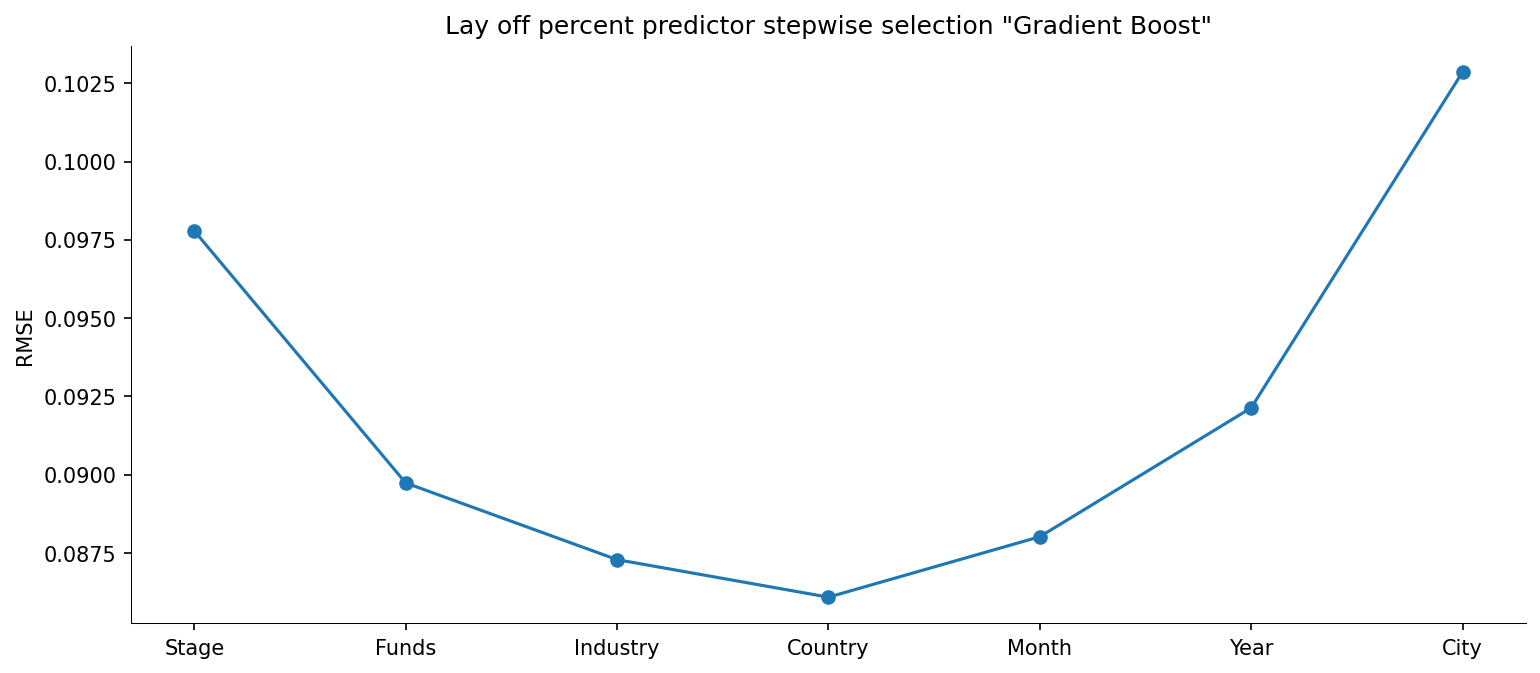

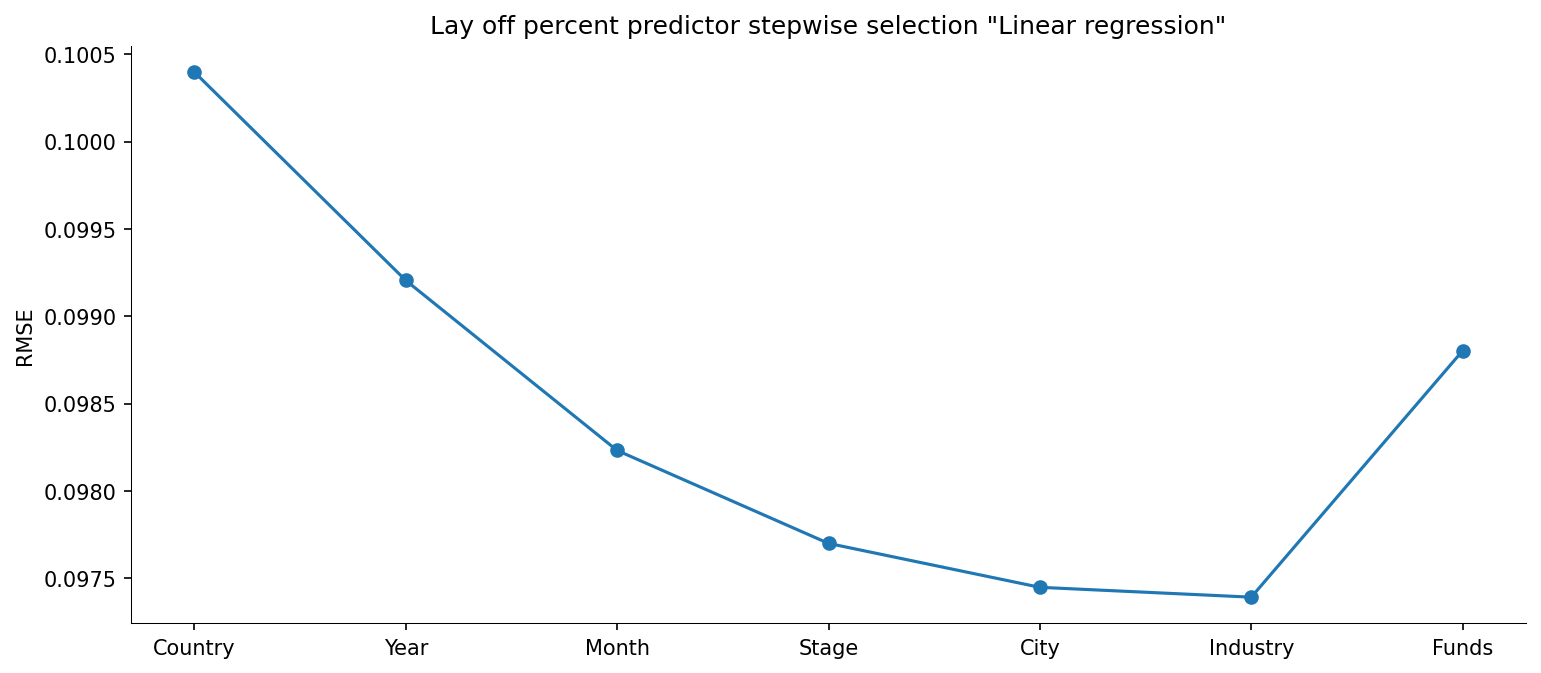

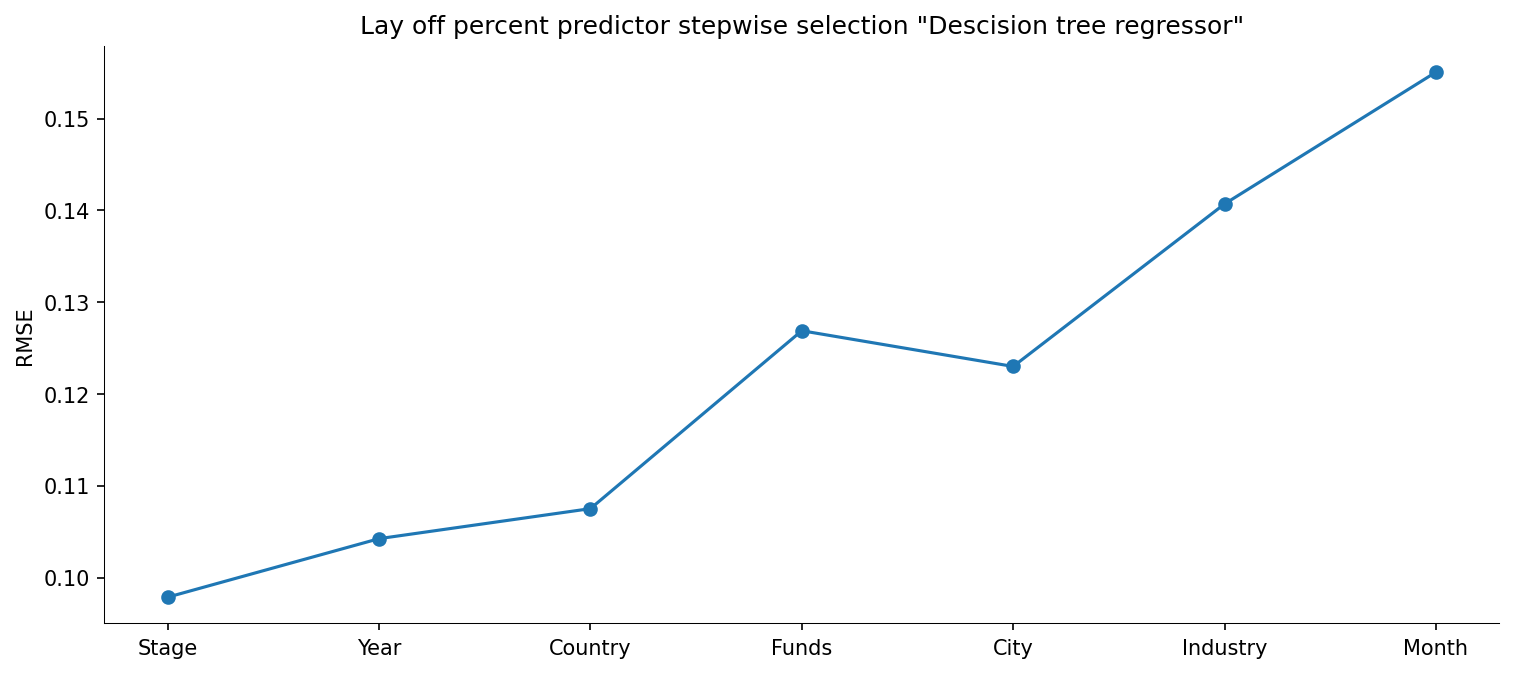

In [194]:
from sklearn.model_selection import train_test_split

d = stepperPredictor( GradientBoostingRegressor( random_state=42))
plt.plot(d, marker='o', linestyle='-')

plt.ylabel('RMSE')
plt.title('Lay off percent predictor stepwise selection "Gradient Boost"')

plt.grid(False)
plt.savefig('gradient.png',transparent=True)
plt.show()

d = stepperPredictor(LinearRegression())
plt.plot(d, marker='o', linestyle='-')

plt.ylabel('RMSE')
plt.title('Lay off percent predictor stepwise selection "Linear regression"')

plt.grid(False)
plt.savefig('linear.png',transparent=True)
plt.show()

d = stepperPredictor( DecisionTreeRegressor(random_state=90))
plt.plot(d, marker='o', linestyle='-')

plt.ylabel('RMSE')
plt.title('Lay off percent predictor stepwise selection "Descision tree regressor"')

plt.grid(False)
plt.savefig('descision.png',transparent=True)
plt.show()

In [195]:

def calculateMetrics():
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    true_values = y_test
    predicted_values = predictions
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    rmse = mean_squared_error(true_values, predicted_values, squared=False)  # RMSE is the square root of 
    # r2 = r2_value
    print (mae)
    print(mse)
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Distribution plot of true values vs. predicted values
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=true_values, y=predicted_values)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values vs. Predicted Values')
    
    # Bar plot for regression metrics
    metrics = ['MAE', 'MSE', 'RMSE']
    values = [mae, mse, rmse]
    plt.subplot(1, 2, 2)
    sns.barplot(x=metrics, y=values, palette="Blues_d")
    plt.ylabel('Value')
    # plt.title('Regression Metrics')
    
    plt.tight_layout()

    plt.grid(False)
    plt.savefig('gradient perform.png',transparent=True)
    # plt.show()

In [196]:
df_encoded = pd.concat([predictionData[['Percentage']],Month,Industry,Stage,Country], axis=1)

X = df_encoded.drop('Percentage', axis=1)
y = df_encoded['Percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor( random_state=34)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE) for Gradient Boost Regression:', rmse)


Root Mean Squared Error (RMSE) for Gradient Boost Regression: 0.1052854062925242


0.085918065468146
0.011085016778181894


C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\2114870829.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




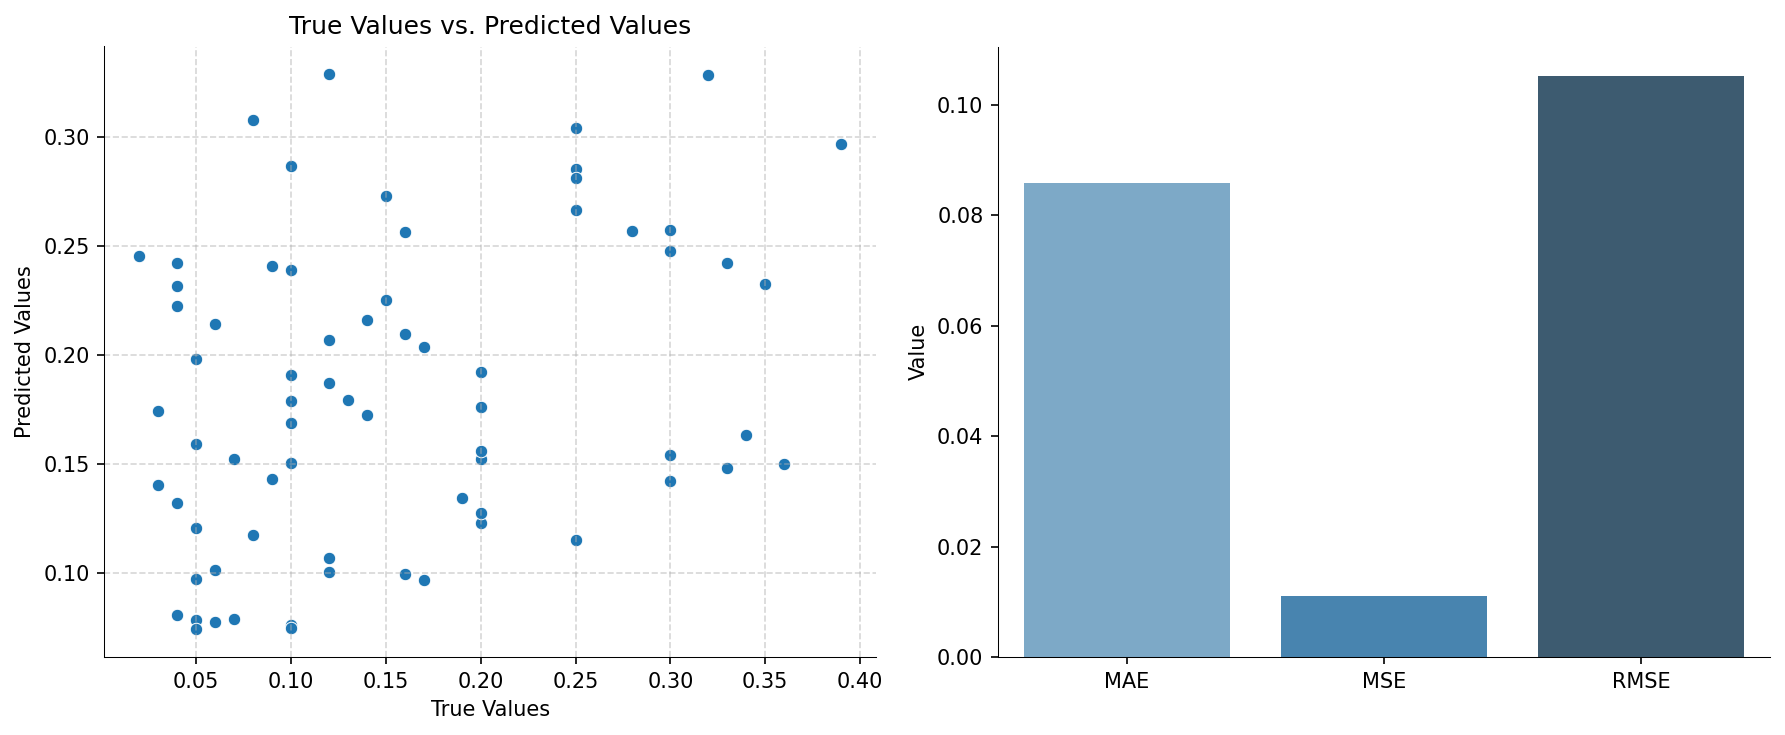

In [197]:
calculateMetrics()

In [198]:
import pickle
with open('gradient_boost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Linear Regression

In [199]:
from sklearn.linear_model import LinearRegression

df_encoded = pd.concat([predictionData[['Percentage']], Year,Month,FundsRaised], axis=1)

X = df_encoded.drop('Percentage', axis=1)
y = df_encoded['Percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE) for Gradient Boosting Regression:', rmse)


Root Mean Squared Error (RMSE) for Gradient Boosting Regression: 0.10315743686036023


0.08747143988228823
0.010641456779599207


C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\anura\AppData\Local\Temp\ipykernel_16716\2114870829.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




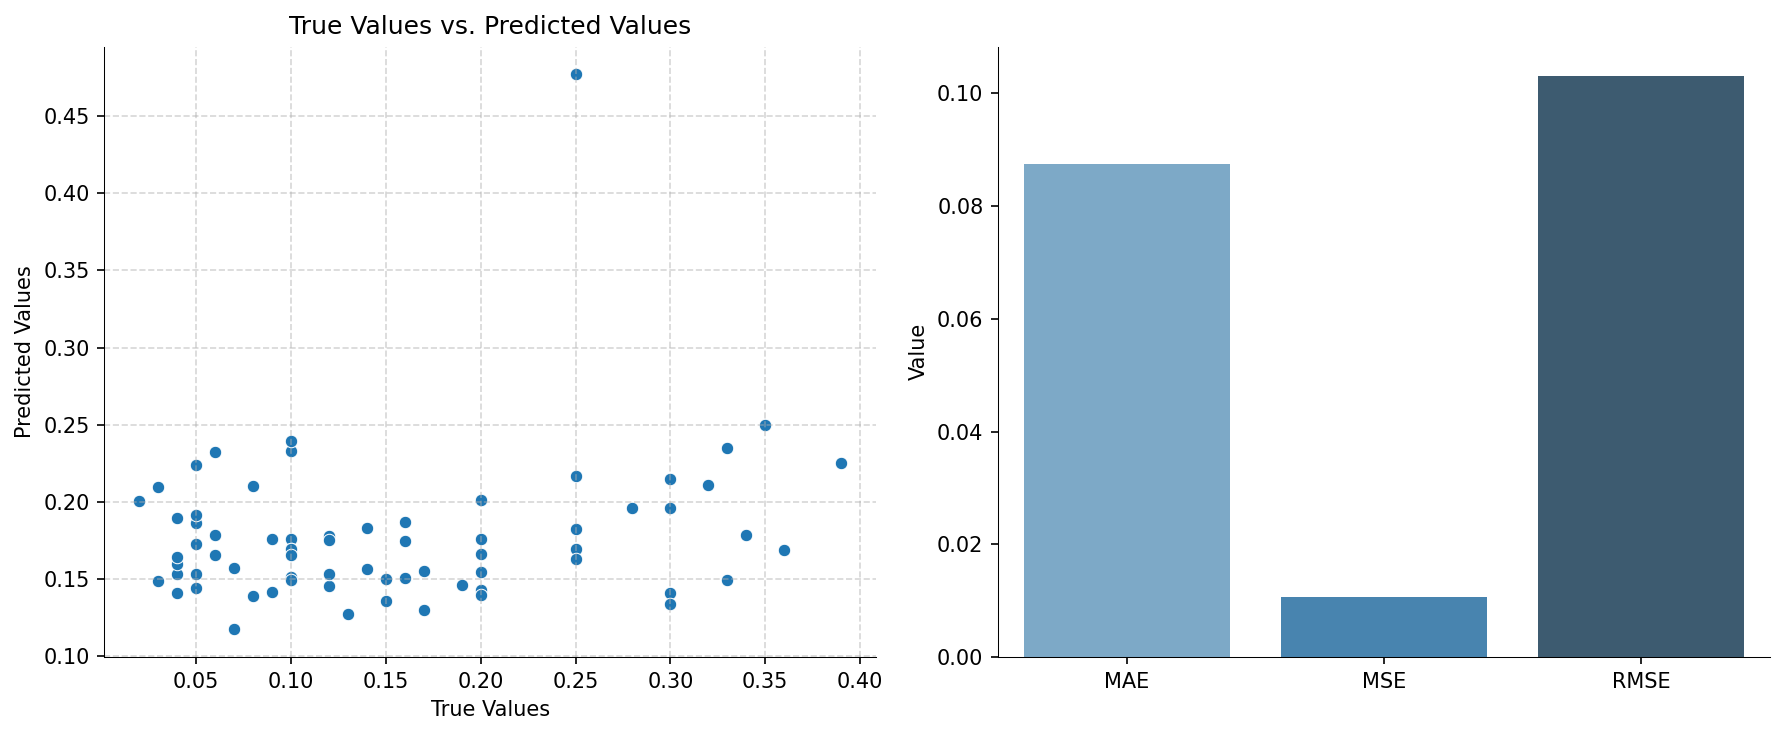

In [200]:
calculateMetrics()

In [201]:
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [202]:
df1.to_csv('dataset/FinalData.csv', index=False)